# import Library

In [1]:
import sys

sys.path.append('../')
from my_library.library import *
from hyperopt import hp, tpe, Trials, fmin,STATUS_OK
from my_library.funcs import *
from scipy import fftpack
%load_ext autoreload




# path ubu

In [ ]:
path_daw = '/home/hipro/デスクトップ/StockPriceData/Stock_index/DAW_10years.csv'
path_tpx = '/home/hipro/デスクトップ/StockPriceData/Stock_index/TOPIX_10years.csv'


# path mac

In [2]:
path_tpx = '/Users/rince/Desktop/StockPriceData/Stock_index/TOPIX_10years.csv'
path_225 = '/Users/rince/Desktop/StockPriceData/Stock_index/NK225_10years.csv'
path_daw = '/Users/rince/Desktop/StockPriceData/Stock_index/DAW_10years.csv'
path_bear = '/Users/rince/Desktop/StockPriceData/Stock_index/R225BEAR_10years.csv'
path_doll = '/Users/rince/Desktop/StockPriceData/Stock_index/doll_yen_bid.csv'


path_gold = '/Users/rince/Desktop/StockPriceData/Stock_index/gold_chusin.csv'
path_kawase = '/Users/rince/Desktop/StockPriceData/Stock_index/quote.csv'

# path win

In [2]:
path_tpx = '/Users/Owner/Desktop/StockPriceData/Stock_index/TOPIX_10years.csv'
path_225 = '/Users/Owner/Desktop/StockPriceData/Stock_index/NK225_10years.csv'
path_daw = '/Users/Owner/Desktop/StockPriceData/Stock_index/DAW_10years.csv'

path_bear = '/Users/Owner/Desktop/StockPriceData/Stock_index/R225BEAR_10years.csv'

path_tpx_sim = '/Users/Owner/Desktop/StockPriceData/TOPIX/TOPIX_20211208.csv'
path_daw_sim = '/Users/Owner/Desktop/StockPriceData/DAW/DAW_20211208.csv'
save_path = '/Users/Owner/Desktop/program/Sotsuron/code/pickles'

# Learn XGB

In [180]:
lx = LearnXGB(num_class=3)
# lx.learn_xgb(path_tpx,path_daw,test_rate=0.7,verbose=False)
x_train,y_train,x_test,y_test = lx.make_xgb_data(path_tpx,path_daw,0.8)

# index 投信 

In [ ]:
tps = TPXSimulation()
tps.simulate(path_tpx,path_daw,start_year=2022,end_year=2022,start_month=1,end_month=12)
pr = tps.return_profit_rate()

# DAW simulte

In [ ]:
path_tpx_sim, path_daw_sim = return_latest_data_path('TOPIX')
ds = DawSimulation()
ds.simulate(path_tpx,path_daw,strategy='reverse',start_year=2021,end_year=2021,start_month=1,end_month=12)


# Random simulate

In [ ]:
path_tpx_sim, path_daw_sim = return_latest_data_path('TOPIX')
rs = RandomSimulation()
rs.simulate(path_tpx_sim,path_daw_sim,start_year=2022,end_year=2022,start_month=1,end_month=5)

# Technical simulate

In [ ]:
ts = TechnicalSimulation()
plt.grid()
ts.simulate(path_tpx,path_daw,start_year=2021,end_year=2021,start_month=1,end_month=12)
pr_log_ts = ts.pr_log

# predict tomorrow

In [ ]:
path_tpx_sim, path_daw_sim = return_latest_data_path('TOPIX')
lx.predict_tomorrow(path_tpx_sim,path_daw_sim,alpha=0.6,strategy='normal',start_year=2022,start_month=1,end_month=6,is_observed=True)

# FFT Simulation new
is_abs = True

# 業種別　解析

In [70]:
def get_gyosyu_df(path_gyosyu = '/Users/Owner/Desktop/StockPriceData/Gyosyu/'):
    FILE = glob.glob(path_gyosyu+'*.csv')
    df_dict = {}
    for file in FILE:
        name = file.replace(path_gyosyu,'')[:-4]
        df = pd.read_csv(file)
        df = df.rename(columns={df.columns[0]:'nan',df.columns[1]:'nan',df.columns[2]:'nan',\
                                    df.columns[3]:'day',df.columns[4]:'nan',df.columns[5]:'open',\
                                    df.columns[6]:'high',df.columns[7]:'low',df.columns[8]:'close',\
                                        df.columns[9]:'volume',})
        df = df.drop('nan',axis=1)
        df = df.drop(df.index[0])
        df['day'] = pd.to_datetime(df['day'],format='%Y/%m/%d')
        df.set_index('day',inplace=True)
        df_dict[name] = df

    return df_dict,FILE

In [183]:
def return_corr(df):
    x = df['daw_close'].values
    y = df['close'].values
    corr = np.corrcoef(x,y)
    return corr



In [186]:
corr_dict = {}


for file in FILE:
    # print("-----------------")
    # print(file[43:].replace('.csv',''))
    sl = Simulation()
    df_con = sl.make_df_con(file,path_tpx)
    df_con = split_df(df_con,2016,2021)
    corr = return_corr(df_con)
    # print("corr :",corr[0,1])
    corr_dict[file[43:].replace('.csv','')] = corr[0,1]



In [188]:
dic2 = sorted(corr_dict.items(),key=lambda x:x[1])
dic2

[('DENKI_GASS', -0.2659474809254807),
 ('KUUUN', -0.16000131549972804),
 ('SENI', 0.06023285069359701),
 ('RIKUUN', 0.0893478632488745),
 ('KOUGYO', 0.10397181228283531),
 ('GINKOU', 0.10972589634520538),
 ('SYOKURYO', 0.11942134201507183),
 ('TEKKOU', 0.14535350811820502),
 ('SUISAN_NOURINGYO', 0.27546516536590915),
 ('SEKIYU_SEKITAN', 0.3385599508936395),
 ('GOMU', 0.5052217420129602),
 ('KENSETSU', 0.5081803919837115),
 ('SYOUKEN_SAKIMONO', 0.5475445291569929),
 ('HUDOUSAN', 0.5534173517175353),
 ('HIKINZOKU', 0.5657757977746739),
 ('PARUPU_KAMI', 0.6458689454592994),
 ('KINZOKU', 0.6517320155237376),
 ('IYAKUHIN', 0.6575603090774779),
 ('KAIUN', 0.6642046080235434),
 ('GARAS_DOSEKI', 0.7477029384303502),
 ('YUSOUYOUKIKI', 0.7798802043971281),
 ('SEIMITSUKIKI', 0.7980934306121776),
 ('HOKEN', 0.8121740487593416),
 ('JOUHOU_TSUUSIN', 0.8418065133788072),
 ('SONOTAKINYUU', 0.884084020835162),
 ('SONOTA_SEIHIN', 0.8844525142240118),
 ('SERVICE', 0.8975999398111042),
 ('SOUKO_UNYU', 0.9

total_profit  profit rate  trade_count  max_profit  min_profit  \
1           0.0          0.0            0         0.0         0.0   

   mean_profit  cant_buy_count  
1          0.0               0

<Figure size 432x288 with 0 Axes>

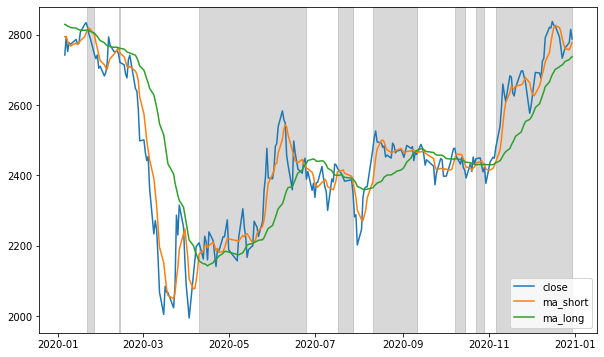

In [190]:
ts = TechnicalSimulation(hold_day=100)
ts.simulate(file,path_daw,start_year=2020,end_year=2020,is_validate=True)

df_dummy = ts.trade_log.copy()
df_dummy.loc[1] = 0
df_dummy

In [192]:
trade_log_dict = {}

for file in FILE:
    df_ = df_dummy.copy()
    for year in [2016,2017,2018,2019,2020,2021]:
        start_year = year
        end_year = year
        ffs = ffs_dict[str(year)]
        ffs.simulate(file,path_daw,start_year=start_year,end_year=end_year,is_validate=True)
        trade_log = ffs.trade_log
        df_.loc[1] += trade_log.loc[1]
    trade_log_dict[file[43:].replace('.csv','')] = df_

In [193]:
trade_log_dict

{'DENKIKIKI':    total_profit  profit rate  trade_count  max_profit  min_profit  \
 1       1059.28      42.3712           41      531.81     -192.83   
 
    mean_profit  cant_buy_count  
 1   179.333706               0  ,
 'DENKI_GASS':    total_profit  profit rate  trade_count  max_profit  min_profit  \
 1         -8.09      -0.3236           31       96.13      -60.63   
 
    mean_profit  cant_buy_count  
 1     3.707652               0  ,
 'GARAS_DOSEKI':    total_profit  profit rate  trade_count  max_profit  min_profit  \
 1        125.37       5.0148           41      192.52     -181.96   
 
    mean_profit  cant_buy_count  
 1     1.328333               0  ,
 'GINKOU':    total_profit  profit rate  trade_count  max_profit  min_profit  \
 1        -27.26      -1.0904            8        8.22      -32.95   
 
    mean_profit  cant_buy_count  
 1        -5.06               0  ,
 'GOMU':    total_profit  profit rate  trade_count  max_profit  min_profit  \
 1       -415.18     -16.

In [99]:
trade_log_dict = {}
for file in FILE:
    print("--------------------")
    print(file[43:])
    for idx,key in enumerate(ffs_dict):
        print("year",key)
        ffs = ffs_dict[key]
        year = int(key)
        if year<2016:
            continue
        ffs.simulate(file,path_daw,start_year=year,end_year=year,is_validate=True)
        trade_log = ffs.trade_log
        file_name = file[43:].replace('.csv','')
        trade_log_dict[file_name+'_'+'year'] = trade_log

--------------------
DENKIKIKI.csv
year 2011
year 2012
year 2013
year 2014
year 2015
year 2016
year 2017
year 2018
year 2019
year 2020
year 2021
--------------------
DENKI_GASS.csv
year 2011
year 2012
year 2013
year 2014
year 2015
year 2016
year 2017
year 2018
year 2019
year 2020
year 2021
--------------------
GARAS_DOSEKI.csv
year 2011
year 2012
year 2013
year 2014
year 2015
year 2016
year 2017
year 2018
year 2019
year 2020
year 2021
--------------------
GINKOU.csv
year 2011
year 2012
year 2013
year 2014
year 2015
year 2016
year 2017
year 2018
year 2019
year 2020
year 2021
--------------------
GOMU.csv
year 2011
year 2012
year 2013
year 2014
year 2015
year 2016
year 2017
year 2018
year 2019
year 2020
year 2021
--------------------
HIKINZOKU.csv
year 2011
year 2012
year 2013
year 2014
year 2015
year 2016
year 2017
year 2018
year 2019
year 2020
year 2021
--------------------
HOKEN.csv
year 2011
year 2012
year 2013
year 2014
year 2015
year 2016
year 2017
year 2018
year 2019
year 2020
yea

In [100]:
for idx,key in enumerate(trade_log_dict):
    print("-----------------------")
    print("key :",key)
    print(trade_log_dict[key])

-----------------------
key : DENKIKIKI_year
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1        186.62       7.4648            5      146.54      -29.95   

   mean_profit  cant_buy_count  
1       37.324               0  
-----------------------
key : DENKI_GASS_year
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1          9.41       0.3764            1        9.41        9.41   

   mean_profit  cant_buy_count  
1         9.41               0  
-----------------------
key : GARAS_DOSEKI_year
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1        -31.22      -1.2488            3       20.02      -42.79   

   mean_profit  cant_buy_count  
1   -10.406667               0  
-----------------------
key : GINKOU_year
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         14.24       0.5696            1       14.24       14.24   

   mean_profit  cant_buy_count  
1        14.24               0  

In [71]:
df_dict,FILE = get_gyosyu_df()

In [74]:
path_gyosyu = '/Users/Owner/Desktop/StockPriceData/Gyosyu/'

In [82]:
for idx,key in enumerate(df_dict):
    print(key.replace(path_gyosyu[:-1],''))
    break

\DENKIKIKI


In [194]:
ts = TPXSimulation()
df = ts.make_df_con(path_tpx,path_daw)
ex_tpx_dict = {}

for year in [2016,2017,2018,2019,2020,2021]:
    df_tmp = df[df.index.year==year]
    mean_close = df_tmp.mean()['close']
    ex_tpx_dict[year] = mean_close
    

In [197]:
ffs_dict

{'2011': <my_library.library.FFTSimulation at 0x2d02e7ae580>,
 '2012': <my_library.library.FFTSimulation at 0x2d0312423a0>,
 '2013': <my_library.library.FFTSimulation at 0x2d0313f1610>,
 '2014': <my_library.library.FFTSimulation at 0x2d033b735b0>,
 '2015': <my_library.library.FFTSimulation at 0x2d034462ee0>,
 '2016': <my_library.library.FFTSimulation at 0x2d033fabe80>,
 '2017': <my_library.library.FFTSimulation at 0x2d031189880>,
 '2018': <my_library.library.FFTSimulation at 0x2d030ba6760>,
 '2019': <my_library.library.FFTSimulation at 0x2d02e4f24c0>,
 '2020': <my_library.library.FFTSimulation at 0x2d031148e20>,
 '2021': <my_library.library.FFTSimulation at 0x2d02e794dc0>}

In [200]:
for file in FILE:
    # df_ = df_dummy.copy()
    name_ = file[43:].replace('.csv','')
    total_pr = 0
    trade_log_list = []
    if name_=='KIKAI' or name_=='KAGAKU' or name_=='OROSIURI' or name_=='DENKIKIKI' or name_=='KOURI':
    # if name_=='KOUGYO' or name_=='SENI' or name_=='SYOKURYO' or name_=='RIKUUN' or name_=='GINKOU':
        for year in [2016,2017,2018,2019,2020,2021]:
            start_year = year
            end_year = year
            ffs = ffs_dict[str(year)]
            ffs.simulate(file,path_daw,start_year=start_year,end_year=end_year,is_validate=True)
            df_tmp = ffs.make_df_con(file,path_daw)
            
            price1 = df_tmp.mean()['close']
            price2 = ex_tpx_dict[year]

            alpha = price2/price1

            trade_log = ffs.trade_log
            # df_.loc[1] += alpha * trade_log.loc[1]
            total_pr += alpha*trade_log['profit rate'].values[0]
            trade_log_list.append(alpha*trade_log['profit rate'].values[0])

        print("------------------")
        print(name_)
        output = ''
        for tr in trade_log_list:
            output += ('{:.2f}'.format(tr)+' & ')
            # break
        output += ('{:.2f}'.format(total_pr)+' \\\\')
        print(output)
        # print(total_pr)
    
            # print(year)
            # print(df_)
            
        trade_log_dict[file[43:].replace('.csv','')] = df_

------------------
DENKIKIKI
4.10 & 0.39 & 3.94 & 12.05 & 2.64 & 6.21 & 29.33 \\
------------------
KAGAKU
0.96 & 0.30 & 1.32 & 10.10 & 1.32 & 4.14 & 18.15 \\
------------------
KIKAI
-3.96 & -0.82 & 0.31 & -3.30 & -0.35 & -6.55 & -14.68 \\
------------------
KOURI
3.09 & 0.00 & 0.00 & 4.36 & 4.47 & 0.86 & 12.79 \\
------------------
OROSIURI
2.18 & 0.58 & -9.10 & -2.04 & 0.17 & 1.37 & -6.84 \\


In [83]:
reutrn_corr()

['/Users/Owner/Desktop/StockPriceData/Gyosyu\\DENKIKIKI.csv',
 '/Users/Owner/Desktop/StockPriceData/Gyosyu\\DENKI_GASS.csv',
 '/Users/Owner/Desktop/StockPriceData/Gyosyu\\GARAS_DOSEKI.csv',
 '/Users/Owner/Desktop/StockPriceData/Gyosyu\\GINKOU.csv',
 '/Users/Owner/Desktop/StockPriceData/Gyosyu\\GOMU.csv',
 '/Users/Owner/Desktop/StockPriceData/Gyosyu\\HIKINZOKU.csv',
 '/Users/Owner/Desktop/StockPriceData/Gyosyu\\HOKEN.csv',
 '/Users/Owner/Desktop/StockPriceData/Gyosyu\\HUDOUSAN.csv',
 '/Users/Owner/Desktop/StockPriceData/Gyosyu\\IYAKUHIN.csv',
 '/Users/Owner/Desktop/StockPriceData/Gyosyu\\JOUHOU_TSUUSIN.csv',
 '/Users/Owner/Desktop/StockPriceData/Gyosyu\\KAGAKU.csv',
 '/Users/Owner/Desktop/StockPriceData/Gyosyu\\KAIUN.csv',
 '/Users/Owner/Desktop/StockPriceData/Gyosyu\\KENSETSU.csv',
 '/Users/Owner/Desktop/StockPriceData/Gyosyu\\KIKAI.csv',
 '/Users/Owner/Desktop/StockPriceData/Gyosyu\\KINZOKU.csv',
 '/Users/Owner/Desktop/StockPriceData/Gyosyu\\KOUGYO.csv',
 '/Users/Owner/Desktop/StockPr

In [ ]:
for i,key in enumerate(df_dict):
    xs = XGBSimulation2(lx)
    xs.simulate(FILE[i],path_daw,start_year=2019,is_validate=True)
    print("------------")
    print(key)
    print(xs.accuracy_df)

# 四半期のsim

# funcs

In [ ]:
ffs_dict = load_pickle()

In [96]:

def split_df(df,start_year,end_year,start_month=1,end_month=12):
    df = df[df.index.year<=end_year]
    df = df[df.index.year>=start_year]
    df = df[df.index.month<=end_month]
    if start_month>0:
        df = df[df.index.month>=start_month]
    return df

def make_value_list(lx,start_year,end_year,path_tpx,path_daw,alpha=0.34,width=20,stride=10,start_month=1,end_month=12):

    lc_dummy = LearnClustering(width=width)
    df_con = lc_dummy.make_df_con(path_tpx,path_daw)
    
    df_con = split_df(df_con,start_year,end_year,start_month,end_month)
    
    x_,z_ = lc_dummy.make_x_data(df_con['close'],stride=stride,test_rate=1.0,width=width)
    length = len(z_)
    value_list = []

    for i in range(length):
        for strategy in ['normal','reverse']:
            try:
                # 本当はXGBSimulation2
                xl = XGBSimulation2(lx,alpha=alpha)
                xl.simulate(path_tpx,path_daw,strategy=strategy,is_validate=True,start_year=start_year,end_year=end_year,df_=z_[i])
                
                trade_log =  xl.trade_log
                total_profit = trade_log['total_profit'].values[0]
                stock_wave = z_[i]
                vt = ValueTable(strategy,alpha,total_profit,trade_log,stock_wave)
                value_list.append(vt)
                
            except Exception as e:
                print(e)
                continue

    return value_list

def return_clx(Value_list):
    Value_good = sorted(Value_list,key=lambda x :x[2],reverse=True)
    Value_bad = sorted(Value_list,key=lambda x :x[2],reverse=False)
    ng = []
    rg = []
    nb = []
    rb = []
    
    # 1sigam = 外れ値 として処理する
    prf_list=[]
    for vg in Value_good:
        total_profit = vg.total_profit
        prf_list.append(total_profit)      
    prf_array = np.array(prf_list)
    st_prf = standarize(prf_array)

    for idx,v in enumerate(Value_good):
        if v.total_profit<=0:break
        # if np.abs(st_prf[idx]) >=1:continue    

        df = v.stock_wave
        strategy = v.strategy
        # print(df)
        # break
        if strategy=="normal":
            ng.append(standarize(df))
        else:
            rg.append(standarize(df))

    prf_list=[]
    for vb in Value_bad:
        total_profit = vb.total_profit
        prf_list.append(total_profit)      
    prf_array = np.array(prf_list)
    st_prf = standarize(prf_array)

    for v in Value_bad:
        if v.total_profit>=0 :break
        # if np.abs(st_prf[idx]) >=1:continue  
        
        df = v.stock_wave
        strategy = v.strategy

        if strategy=="normal":
            nb.append(standarize(df))
        else:
            rb.append(standarize(df))

    x_ng = make_easy_x(ng)
    x_nb = make_easy_x(nb)
    x_rg = make_easy_x(rg)
    x_rb = make_easy_x(rb)
    return x_ng,x_nb,x_rg,x_rb

def return_ffs(lx,x_ng,x_nb,x_rg,x_rb,FFT_simulation,width=20,stride=10,window_type='none'):


    log_dict = {}
    cs_dict = {}
    ffs_dict = {}
    

    random_state=0

    alpha = 0.33
    n_cluster = 1
        
    Fstrategies = []
    Wstrategies = []
    Cstrategies = []
    F_list = []
    Phases = []
    lc_rg = LearnClustering(n_cluster=n_cluster,random_state=random_state)
    lc_rg.learn_clustering3(x_rg,width=width)
    lc_rb = LearnClustering(n_cluster=n_cluster,random_state=random_state)
    lc_rb.learn_clustering3(x_rb,width=width)
    lc_ng = LearnClustering(n_cluster=n_cluster,random_state=random_state)
    lc_ng.learn_clustering3(x_ng,width=width)
    lc_nb = LearnClustering(n_cluster=n_cluster,random_state=random_state)
    lc_nb.learn_clustering3(x_nb,width=width)

    strategy_list = ['normal','stay','reverse','stay']

    j=0
    fft_dummy = FFTSimulation(lx,None,width=width,window_type=window_type,is_low_pass=True,is_high_pass=False)
    for lc in [lc_ng,lc_nb,lc_rg,lc_rb]:
        
        for _,key in enumerate(lc.wave_dict):
            wave = lc.wave_dict[key]
            # このタイミングでハイパスフィルタかける
            # make_spectrum 内の関数をいじる
            spe = fft_dummy.make_spectrum(wave)
            ceps = fft_dummy.make_cepstrum(spe)
            F,Amp = fft_dummy.do_fft(wave)
            F = F[:len(F)//2]
            phase = np.degrees(np.angle(F))
            strategy = strategy_list[j]
            fs  = Fstrategy(strategy,alpha,spe)
            ws = Fstrategy(strategy,alpha,wave)
            ph = Fstrategy(strategy,alpha,phase)
            cs = Fstrategy(strategy,alpha,ceps)
            
            Fstrategies.append(fs)
            Wstrategies.append(ws)
            Cstrategies.append(cs)
            Phases.append(ph)
            F_list.append(F)
        j+=1

    return Fstrategies,Phases,F_list,Cstrategies

def return_fft_list(lx,x_,FFT_obj,width=20):

    fft_list = []
    fft_dummy = FFT_obj(lx,None,width=width)
    for wave in x_:
        spe = fft_dummy.make_spectrum(wave)
        fft_list.append(spe)
        
    return fft_list        

def return_cumulative_fst(Fstrategies_new,Fstrategies_old):
    Fstrategies = []
    strategy_list = ['normal','stay','reverse','stay']

    for idx,fst in enumerate(Fstrategies_new):
        spe_new = fst.spectrum
        fst_old = Fstrategies_old[idx]
        spe_old = fst_old.spectrum
        spe_new = standarize(spe_new+spe_old)

        
        fs  = Fstrategy(fst_old.strategy,0.33,spe_new)
        Fstrategies.append(fs)
    
    return Fstrategies

    

In [73]:
%autoreload

# 4半期単位のvalue_list

In [ ]:


lx_dict = {}
value_dict = {}

width  = 40
stride = 5
lx_dummy = LearnXGB(num_class=3)
x_train,y_train,_,_= lx_dummy.make_xgb_data(path_tpx,path_daw,test_rate=1.0)
_,_ ,x_test,y_test = lx_dummy.make_xgb_data(path_tpx,path_daw,test_rate=0.9)

# value_list 学習させるために 1Q ずらした lx が必要
x_train_ = split_df(x_train,2005,2016,1,12)
y_train_ = y_train[:len(x_train_)]
lx = LearnXGB(num_class=3)
lx.learn_xgb2(x_train_,y_train_,x_test,y_test,verbose=False)
lx_dict[str(2016)+'4Q'] = lx

for year in [2017,2018,2019,2020,2021]:
    for month in [1,4,7,10]:
        start_year = 2005
        end_year = year
        start_month = 1
        end_month = month + 2
        Q = ''
        
        x_train_ = split_df(x_train,start_year,end_year,start_month,end_month)
        y_train_ = y_train[:len(x_train_)]
        
        
        lx = LearnXGB(num_class=3)
        lx.learn_xgb2(x_train_,y_train_,x_test,y_test,verbose=False)
        
        
        
        if month==1:
            Q = '1Q'
        elif month==4:
            Q = '2Q'
        elif month==7:
            Q = '3Q'
        elif month==10:
            Q = '4Q'
            
            
        last_key = next(reversed(lx_dict),None)
        value_list = make_value_list(lx_dict[last_key],year,year,path_tpx,path_daw,width=width,stride=stride,start_month=month,end_month=month+2)
        value_dict[str(year)+Q] = value_list
        
        lx_dict[str(year)+Q] = lx
        


# 1年単位

In [11]:


lx_dict = {}
value_dict = {}

width  = 40
stride = 5
lx_dummy = LearnXGB(num_class=3)
x_train,y_train,_,_= lx_dummy.make_xgb_data(path_tpx,path_daw,test_rate=1.0)
_,_ ,x_test,y_test = lx_dummy.make_xgb_data(path_tpx,path_daw,test_rate=0.9)

# value_list 学習させるために 1Q ずらした lx が必要
limit_year = 2009
x_train_ = split_df(x_train,2005,limit_year)
y_train_ = y_train[:len(x_train_)]
lx = LearnXGB(num_class=3)
lx.learn_xgb2(x_train_,y_train_,x_test,y_test,verbose=False)
lx_dict[str(limit_year)] = lx

for year in range(limit_year+1,2022):
    start_year = 2005
    end_year = year

    x_train_ = split_df(x_train,start_year,end_year)
    y_train_ = y_train[:len(x_train_)]
    
    
    lx = LearnXGB(num_class=3)
    lx.learn_xgb2(x_train_,y_train_,x_test,y_test,verbose=False)

    last_key = next(reversed(lx_dict),None)
    value_list = make_value_list(lx_dict[last_key],year,year,path_tpx,path_daw,width=width,stride=stride)
    value_dict[str(year)] = value_list
    
    lx_dict[str(year)] = lx
        


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, 

division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


division by zero
division by zero
division by zero
division by zero


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, 

division by zero
division by zero
division by zero
division by zero


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


division by zero
division by zero
division by zero
division by zero


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, 

division by zero
division by zero


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


division by zero
division by zero


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [12]:
def concat_list(key_list,value_dict):
    value_list = []
    for key in key_list:
        v_lis = value_dict[key]
        for v in v_lis:
            value_list.append(v)
    return value_list

# 四半期ごとの　fft simulator

In [14]:

ffs_dict = {}
trade_dict = {}
width  = 40
stride = 5
lx_dummy = LearnXGB(num_class=3)
x_train,y_train,_,_= lx_dummy.make_xgb_data(path_tpx,path_daw,test_rate=1.0)
_,_ ,x_test,y_test = lx_dummy.make_xgb_data(path_tpx,path_daw,test_rate=0.9)
window_type = 'none'
F_list = []
F_lis_dict = {}
is_ceps = True


for year in [2018,2019,2020,2021]:
    print(year)
    for month in [1,4,7,10]:
        start_month=month
        end_month = month+2
        start_year = year
        end_year = year
        
        if month==1:
            Q = '1Q'
        elif month==4:
            Q = '2Q'
        elif month==7:
            Q = '3Q'
        elif month==10:
            Q = '4Q'
            
        preQ = ''
        lx_ = None
        if Q == '1Q':
            key_list = [
                str(year-1)+'1Q',
                str(year-1)+'2Q',
                str(year-1)+'3Q',
                str(year-1)+'4Q',
                ]
            lx_ = lx_dict[str(year-1)+'4Q']
            value_list = concat_list(key_list,value_dict)
            
        elif Q == '2Q':
            preQ = '1Q'
            key_list = [
                str(year-1)+'2Q',
                str(year-1)+'3Q',
                str(year-1)+'4Q',
                str(year)+'1Q',
                ]
            lx_ = lx_dict[str(year)+'1Q']
            value_list = concat_list(key_list,value_dict)
        
        elif Q == '3Q':
            key_list = [
                str(year-1)+'3Q',
                str(year-1)+'4Q',
                str(year)+'1Q',
                str(year)+'2Q',
                ]
            lx_ = lx_dict[str(year)+'2Q']
            value_list = concat_list(key_list,value_dict)
        
        elif Q == '4Q':
            key_list = [
                str(year-1)+'4Q',
                str(year)+'1Q',
                str(year)+'2Q',
                str(year)+'3Q',
                ]
            lx_ = lx_dict[str(year)+'3Q']
            value_list = concat_list(key_list,value_dict)
        
        x_ng,x_nb,x_rg,x_rb = return_clx(value_list)

        try:
            Fstrategies,_,F_list,Cstrategies = return_ffs(lx_,x_ng,x_nb,x_rg,x_rb,FFTSimulation,width=width,stride=stride,window_type=window_type)
            
            # Fstrategies をどんどん加算していく    
            # if len(ffs_dict)>0:
            #     last_key = next(reversed(ffs_dict),None)
            #     Fstrategies_old = ffs_dict[last_key].Fstrategies
            #     Fstrategies = return_cumulative_fst(Fstrategies,Fstrategies_old)
        
        except Exception as e:
            print(e)
            last_key = next(reversed(ffs_dict),None)
            # Fstrategies = ffs_dict[last_key].Fstrategies
            # Cepstrum で　やってみる
            Cstrategies = ffs_dict[last_key].Fstrategies
            
        
        # ffs = FFTSimulation(lx,Fstrategies,width=width,window_type=window_type)
        ffs = FFTSimulation(lx,Cstrategies,width=width,window_type=window_type,is_ceps=is_ceps)
        ffs.simulate(path_tpx,path_daw,start_year=year,end_year=year,start_month=start_month,end_month=end_month,is_validate=True)
        
        ffs_dict[str(year)+Q] = ffs
        trade_dict[str(year)+Q] = ffs.trade_log
        F_lis_dict[str(year)+Q] = F_list


2018
2019
2020
2021
Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


# 凡例作ってます

In [13]:
from scipy import signal
from scipy import fftpack


def blackman(data,Fs):
    bla = signal.blackman(Fs)
    acf = 1 / (sum(bla) / Fs)               
    data = data * bla  # 窓関数をかける 
    return data, acf

In [173]:
wave = lc_rg.wave_dict[0]
Fs = len(wave)
data,_ = blackman(wave,Fs)

In [176]:
F = np.fft.fft(data)
F = F[:len(F)//2]
Amp = np.abs(F)

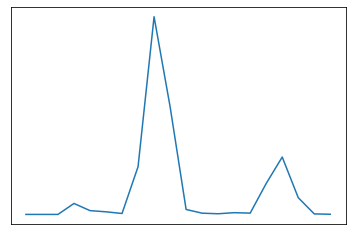

In [179]:
spe = ffs_dict[str(2020)].Fstrategies[0].spectrum
plt.clf()
plt.plot(spe)
# plt.tick_params(labelbottom=False,labelleft=False)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

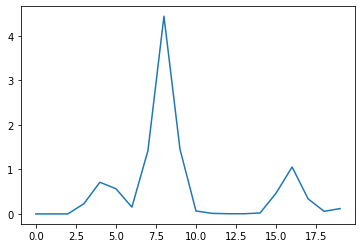

In [160]:
plt.plot(spe)

2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


<Figure size 432x288 with 0 Axes>

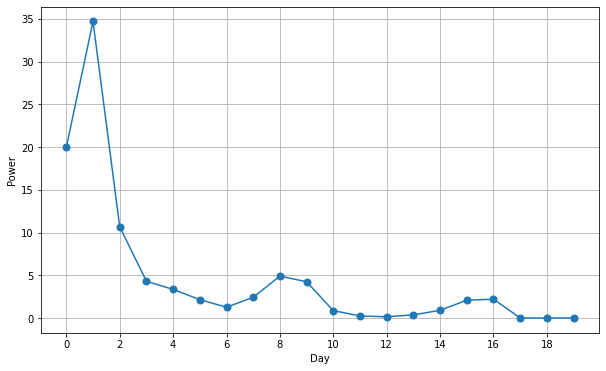

In [108]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 6), facecolor="w")
ave_wave = np.zeros(20)
for year in range(2012,2022):
    
    print(year)
    start_month=1
    end_month = 12
    start_year = year
    end_year = year
    value_list = value_dict[str(year-1)]
    x_ng,x_nb,x_rg,x_rb = return_clx(value_list)
    random_state=0
    n_cluster = 1
    window_type = 'bla'
    st = 0
    
    # ffs = ffs_dict[str(year)]
    # spe = ffs.Fstrategies[st].spectrum
    # """
    lc_rg = LearnClustering(n_cluster=n_cluster,random_state=random_state)
    lc_rg.learn_clustering3(x_rg,width=width)
    lc_rb = LearnClustering(n_cluster=n_cluster,random_state=random_state)
    lc_rb.learn_clustering3(x_rb,width=width)
    lc_ng = LearnClustering(n_cluster=n_cluster,random_state=random_state)
    lc_ng.learn_clustering3(x_ng,width=width)
    lc_nb = LearnClustering(n_cluster=n_cluster,random_state=random_state)
    lc_nb.learn_clustering3(x_nb,width=width)
    # """
    
    fft_dummy = FFTSimulation(lx,None,width=width,window_type=window_type)
        
    wave = lc_rb.wave_dict[0]

    spe = fft_dummy.make_spectrum(wave)
    ceps = fft_dummy.make_cepstrum(spe)
    F,Amp = fft_dummy.do_fft(wave)
    
    ave_wave += spe
    # for year in [2018,2019,2020]:
    
    # ax.plot(spe,marker='o',markersize=7)
ax.plot(ave_wave,marker='o',markersize=7)
    
        
ax.set_xlabel("Day")
ax.set_ylabel("Power")
ax.set_xticks(range(0,20,2))
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid()
plt.show()

C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


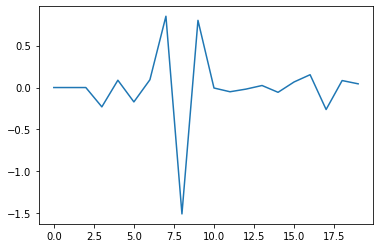

In [147]:
plt.plot(F)

# 1年ごとのffs

In [97]:

ffs_dict = {}
trade_dict = {}
width  = 40
stride = 5
lx_dummy = LearnXGB(num_class=3)
x_train,y_train,_,_= lx_dummy.make_xgb_data(path_tpx,path_daw,test_rate=1.0)
_,_ ,x_test,y_test = lx_dummy.make_xgb_data(path_tpx,path_daw,test_rate=0.9)
window_type = 'bla'
F_list = []
F_lis_dict = {}
is_ceps = False


for year in range(limit_year+2,2022):
    print(year)

    start_month=1
    end_month = 12
    start_year = year
    end_year = year
    value_list = value_dict[str(year-1)]
    lx_ = lx_dict[str(year-1)]

    x_ng,x_nb,x_rg,x_rb = return_clx(value_list)

    try:
        Fstrategies,_,F_list,Cstrategies = return_ffs(lx_,x_ng,x_nb,x_rg,x_rb,FFTSimulation,width=width,stride=stride,window_type=window_type)
        
        # Fstrategies をどんどん加算していく    
        # if len(ffs_dict)>0:
        #     last_key = next(reversed(ffs_dict),None)
        #     Fstrategies_old = ffs_dict[last_key].Fstrategies
        #     Fstrategies = return_cumulative_fst(Fstrategies,Fstrategies_old)
    
    except Exception as e:
        print(e)
        last_key = next(reversed(ffs_dict),None)
        Fstrategies = ffs_dict[last_key].Fstrategies
        # Cepstrum で　やってみる
        # Cstrategies = ffs_dict[last_key].Fstrategies
        
    
    # ffs = FFTSimulation(lx,Fstrategies,width=width,window_type=window_type)
    ffs = FFTSimulation(lx,Fstrategies,width=width,window_type=window_type,is_ceps=is_ceps,is_high_pass=False,is_low_pass=True)
    ffs.simulate(path_tpx,path_daw,start_year=year,end_year=year,is_validate=True)
    
    ffs_dict[str(year)] = ffs
    trade_dict[str(year)] = ffs.trade_log
    F_lis_dict[str(year)] = F_list


2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [111]:
value_dict

{'2010': [ValueTable(strategy='normal', alpha=0.34, total_profit=-35.0, trade_log=   total_profit  profit rate  trade_count  max_profit  min_profit  \
  1         -35.0         -1.4            5        10.0       -20.0   
  
     mean_profit  cant_buy_count  
  1         -7.0               0  , stock_wave=day
  2010-01-04    929.0
  2010-01-05    935.0
  2010-01-06    945.0
  2010-01-07    945.0
  2010-01-08    957.0
  2010-01-12    968.0
  2010-01-13    959.0
  2010-01-14    972.0
  2010-01-15    978.0
  2010-01-19    964.0
  2010-01-20    959.0
  2010-01-21    972.0
  2010-01-22    953.0
  2010-01-25    951.0
  2010-01-26    931.0
  2010-01-27    922.0
  2010-01-28    930.0
  2010-01-29    916.0
  2010-02-01    908.0
  2010-02-02    926.0
  2010-02-03    930.0
  2010-02-04    927.0
  2010-02-05    907.0
  2010-02-08    898.0
  2010-02-09    896.0
  2010-02-10    898.0
  2010-02-12    907.0
  2010-02-16    899.0
  2010-02-17    919.0
  2010-02-18    918.0
  2010-02-19    904.0
  2010-

In [112]:
# save_path = '/Users/Owner/Desktop/program/Sotsuron/code/wave_pickles/value_dict.pickle'
# save_pickle(save_path,value_dict)

# 代表波形の周波数成分

2011


<Figure size 432x288 with 0 Axes>

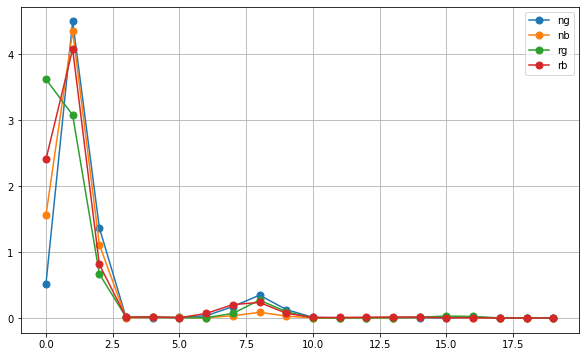

2012


<Figure size 432x288 with 0 Axes>

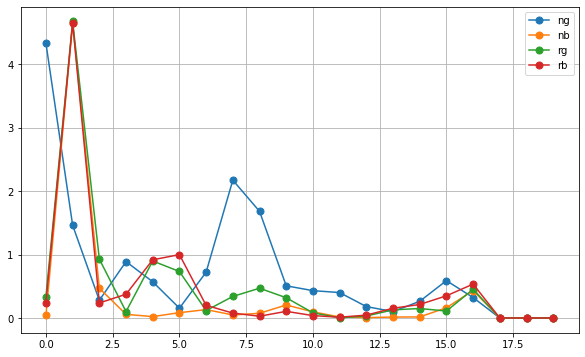

2013


<Figure size 432x288 with 0 Axes>

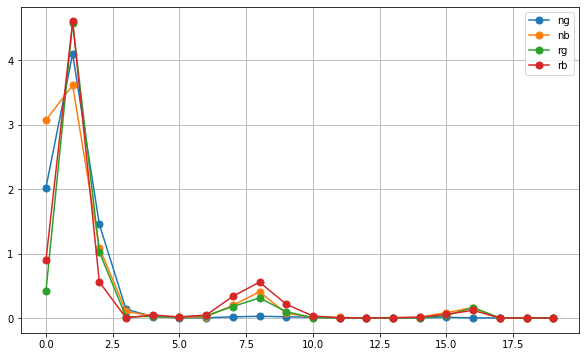

2014


<Figure size 432x288 with 0 Axes>

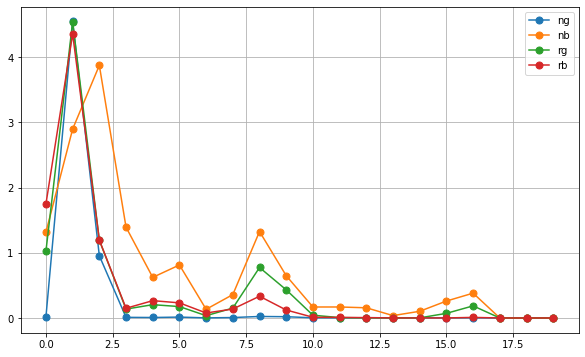

2015


<Figure size 432x288 with 0 Axes>

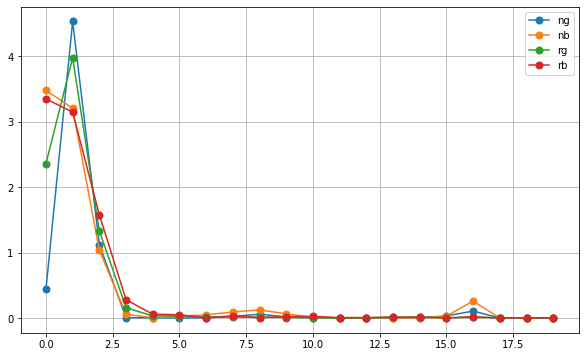

2016


<Figure size 432x288 with 0 Axes>

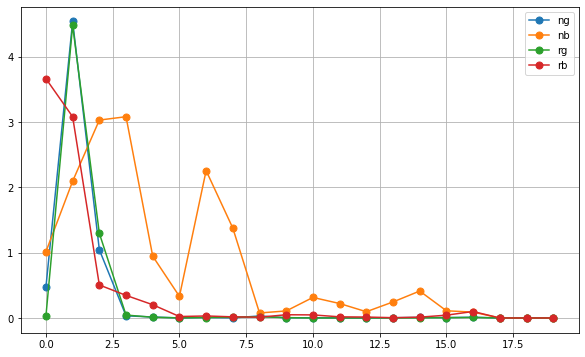

2017


<Figure size 432x288 with 0 Axes>

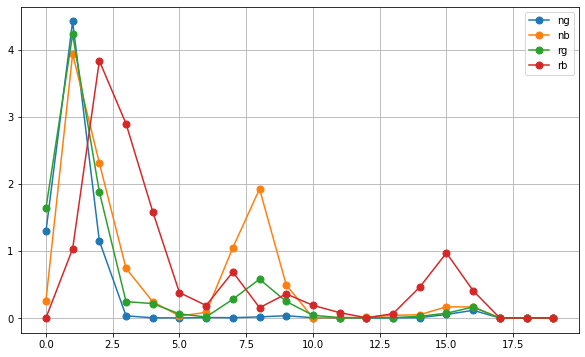

2018


<Figure size 432x288 with 0 Axes>

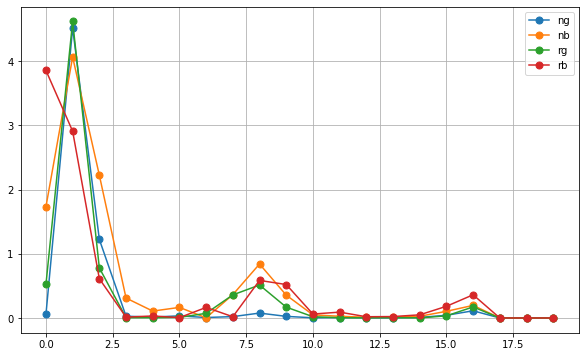

2019


<Figure size 432x288 with 0 Axes>

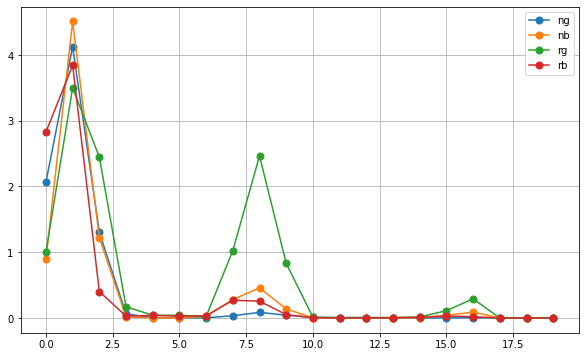

2020


<Figure size 432x288 with 0 Axes>

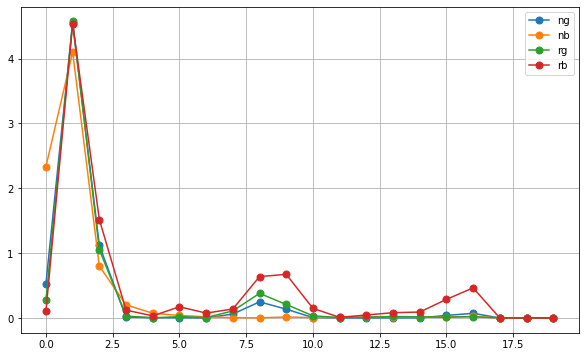

2021


<Figure size 432x288 with 0 Axes>

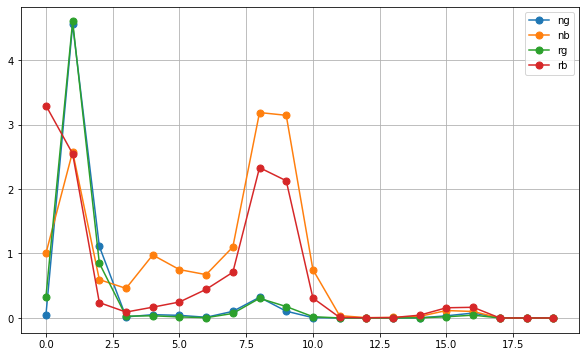

In [98]:
plt.clf()
for idx,key in enumerate(ffs_dict):
    Fstrategies = ffs_dict[key].Fstrategies
    # 0 : ng, 1 : nb, 2 : rg, 3: rb
    print(key)
    plt.clf()
    fig, ax = plt.subplots(figsize=(10, 6), facecolor="w")
    
    for idx,fs in enumerate(Fstrategies):
        if idx==0:
            label='ng'
        elif idx == 1:
            label='nb'
        elif idx == 2:
            label='rg'
        elif idx == 3:
            label='rb'
        ax.plot(fs.spectrum,label=label,marker='o',markersize=7)
    

    ax.grid()
    ax.legend()
    plt.show()

# 実部と虚部で分けたプロット

20181Q
ng


<Figure size 432x288 with 0 Axes>

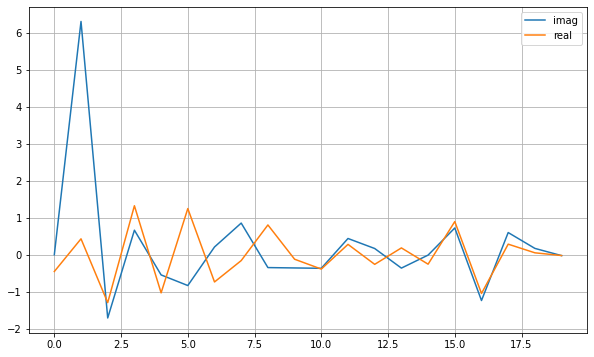

nb


<Figure size 432x288 with 0 Axes>

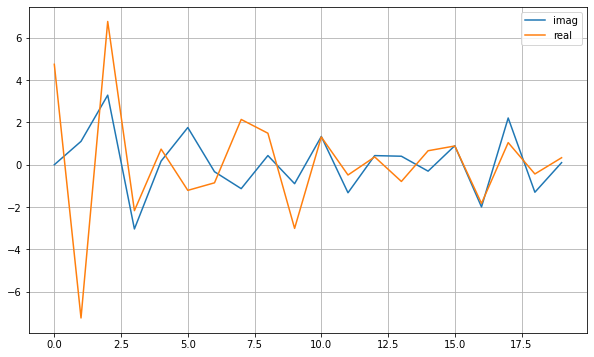

rg


<Figure size 432x288 with 0 Axes>

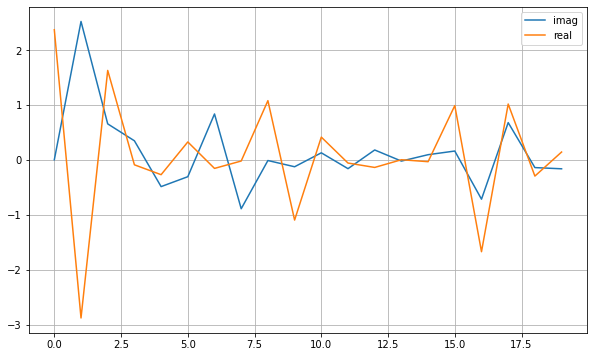

rb


<Figure size 432x288 with 0 Axes>

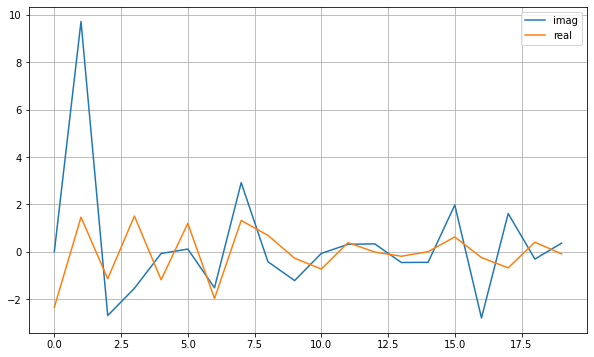

20182Q
ng


<Figure size 432x288 with 0 Axes>

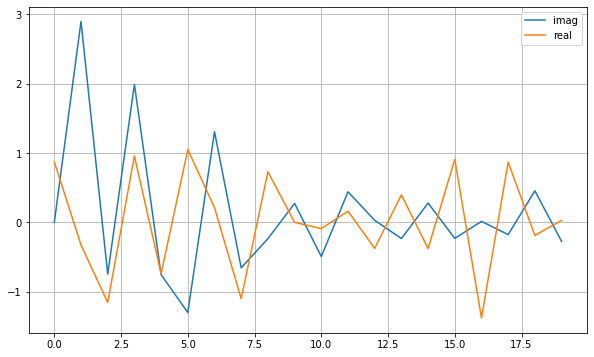

nb


<Figure size 432x288 with 0 Axes>

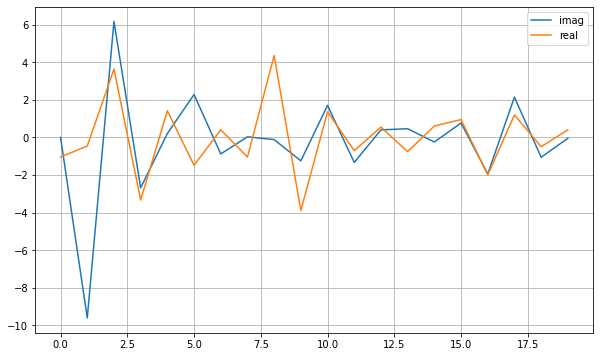

rg


<Figure size 432x288 with 0 Axes>

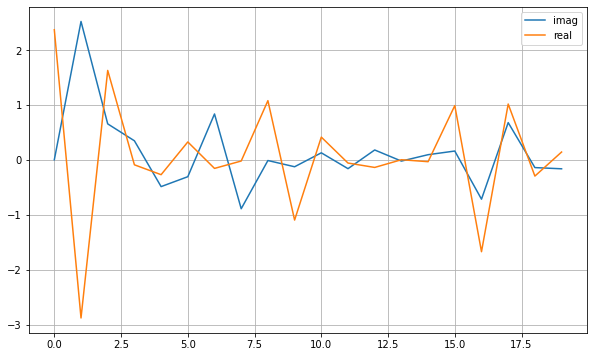

rb


<Figure size 432x288 with 0 Axes>

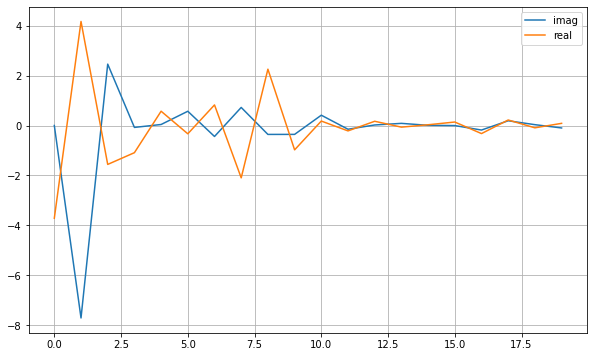

20183Q
ng


<Figure size 432x288 with 0 Axes>

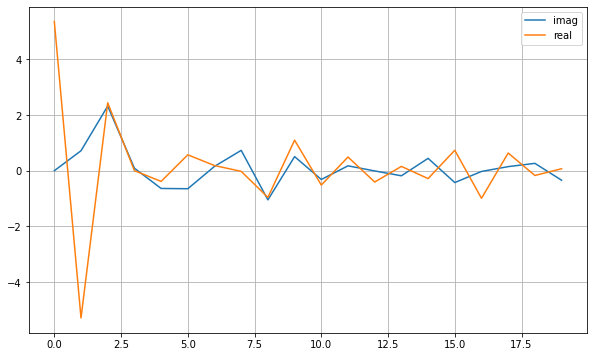

nb


<Figure size 432x288 with 0 Axes>

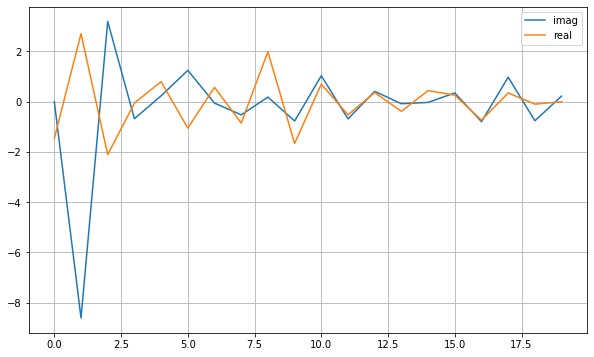

rg


<Figure size 432x288 with 0 Axes>

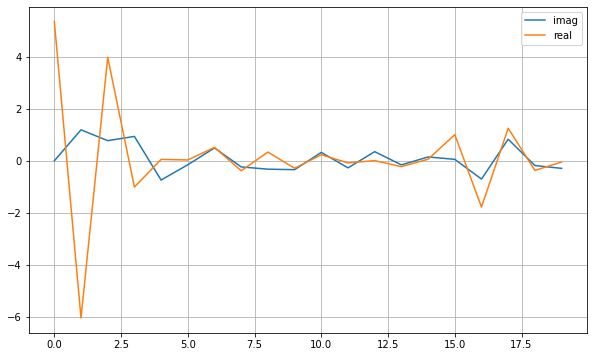

rb


<Figure size 432x288 with 0 Axes>

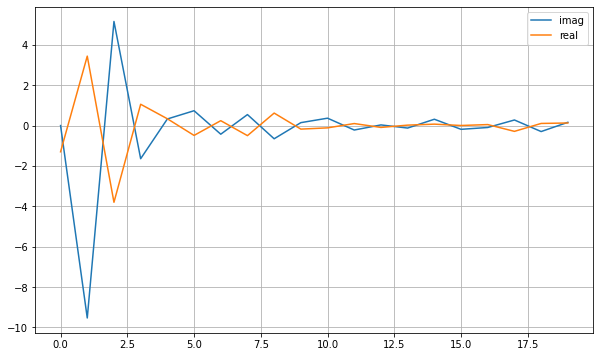

20184Q
ng


<Figure size 432x288 with 0 Axes>

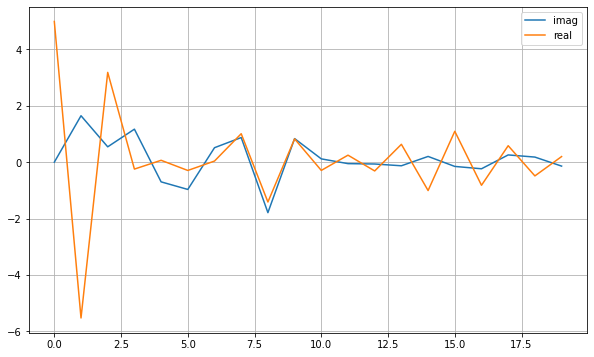

nb


<Figure size 432x288 with 0 Axes>

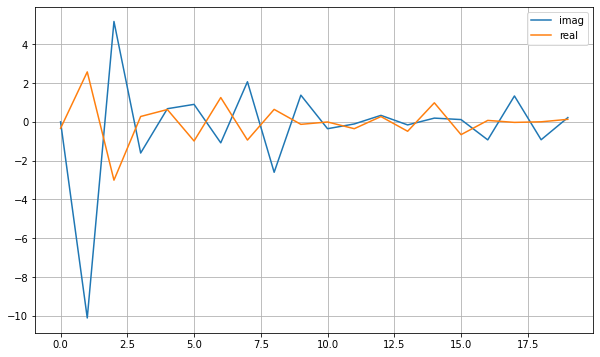

rg


<Figure size 432x288 with 0 Axes>

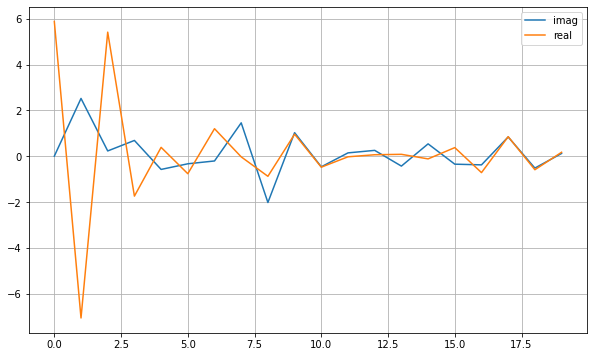

rb


<Figure size 432x288 with 0 Axes>

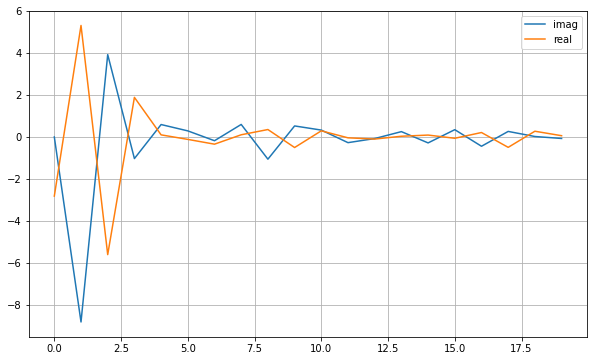

20191Q
ng


<Figure size 432x288 with 0 Axes>

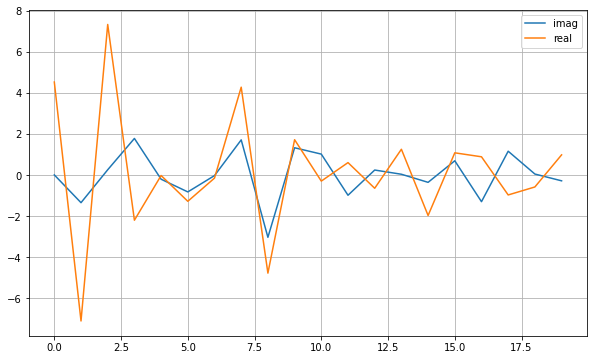

nb


<Figure size 432x288 with 0 Axes>

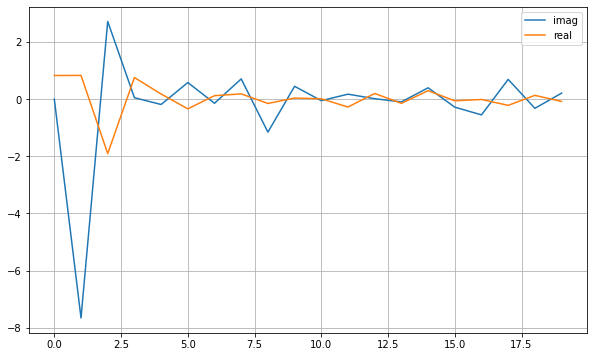

rg


<Figure size 432x288 with 0 Axes>

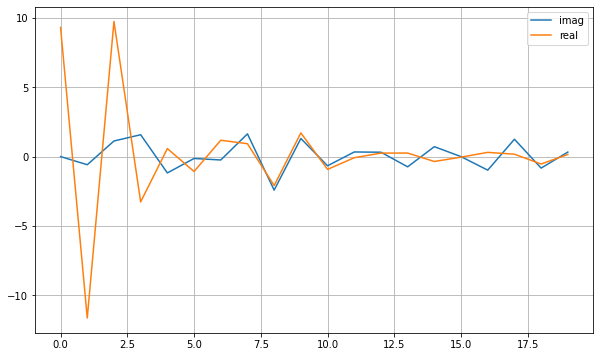

rb


<Figure size 432x288 with 0 Axes>

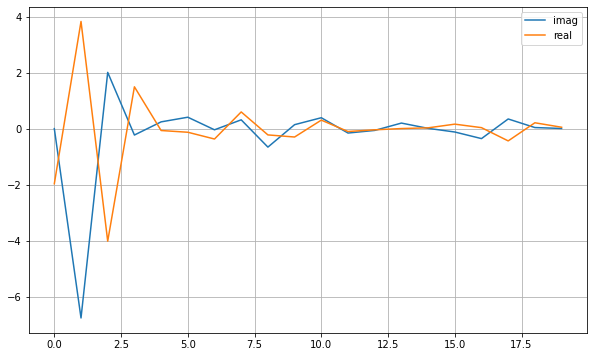

20192Q
ng


<Figure size 432x288 with 0 Axes>

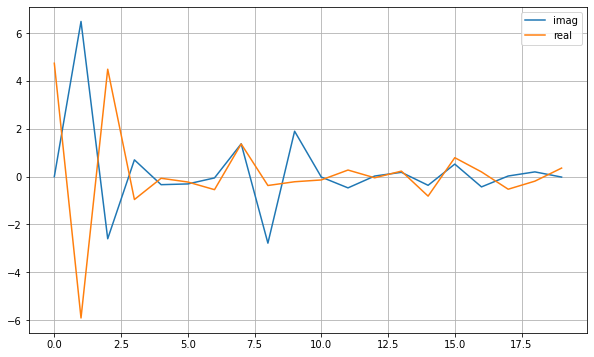

nb


<Figure size 432x288 with 0 Axes>

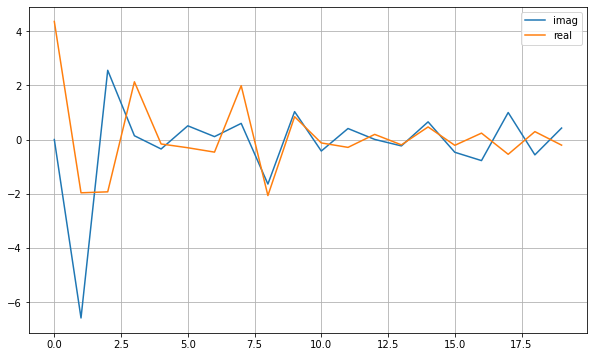

rg


<Figure size 432x288 with 0 Axes>

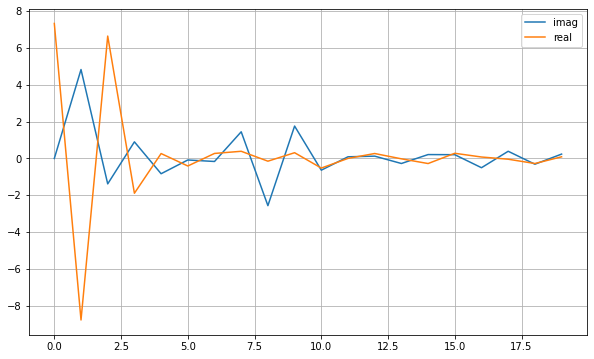

rb


<Figure size 432x288 with 0 Axes>

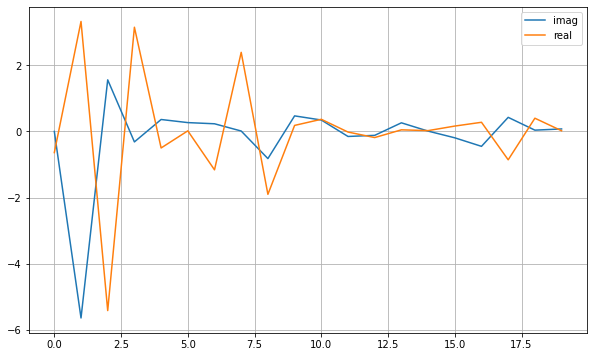

20193Q
ng


<Figure size 432x288 with 0 Axes>

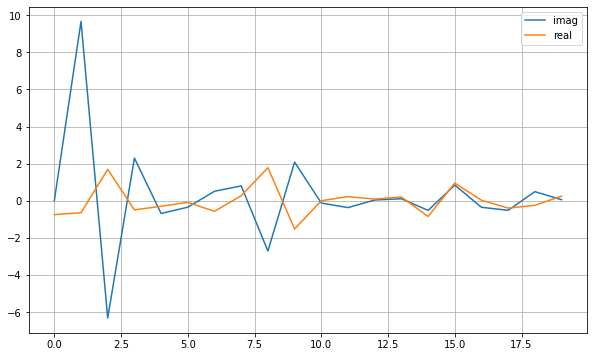

nb


<Figure size 432x288 with 0 Axes>

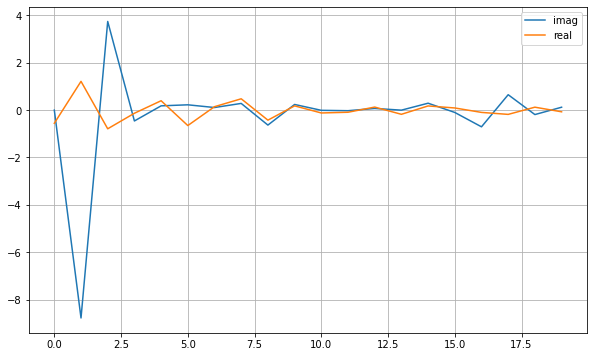

rg


<Figure size 432x288 with 0 Axes>

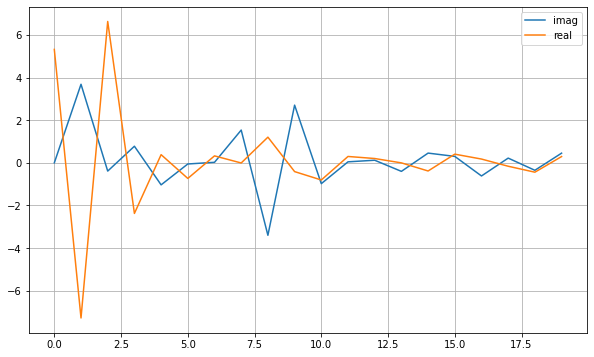

rb


<Figure size 432x288 with 0 Axes>

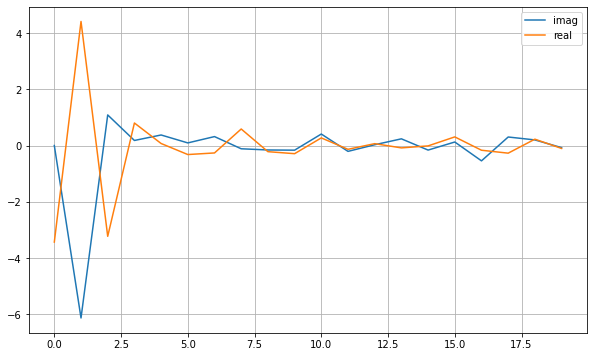

20194Q
ng


<Figure size 432x288 with 0 Axes>

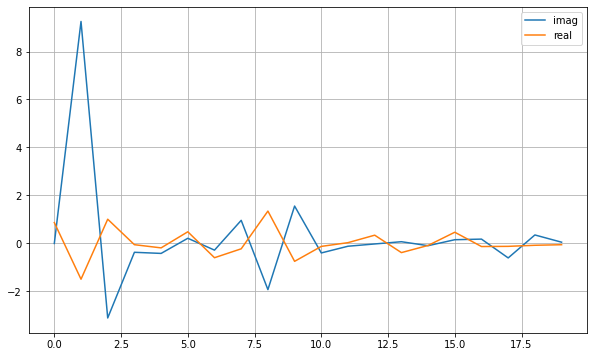

nb


<Figure size 432x288 with 0 Axes>

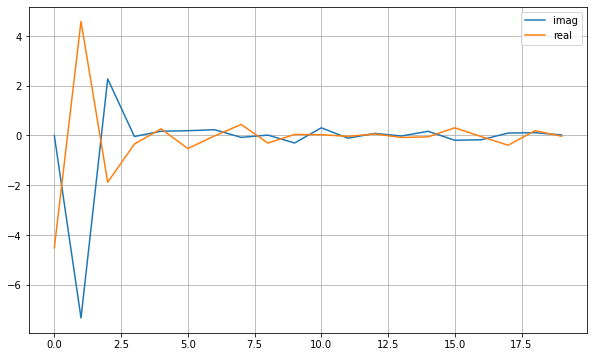

rg


<Figure size 432x288 with 0 Axes>

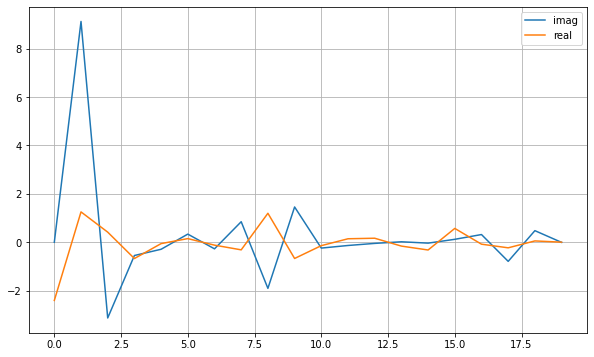

rb


<Figure size 432x288 with 0 Axes>

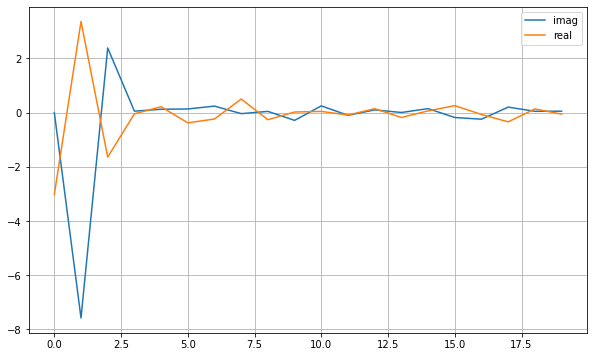

20201Q
ng


<Figure size 432x288 with 0 Axes>

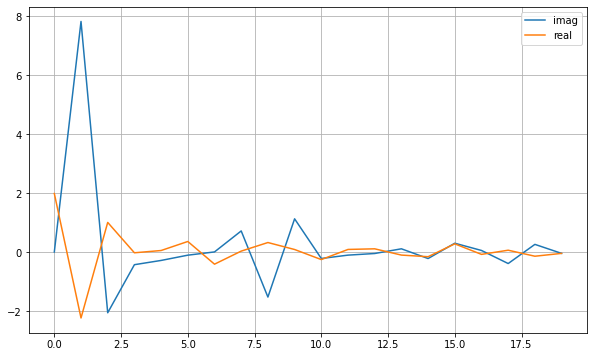

nb


<Figure size 432x288 with 0 Axes>

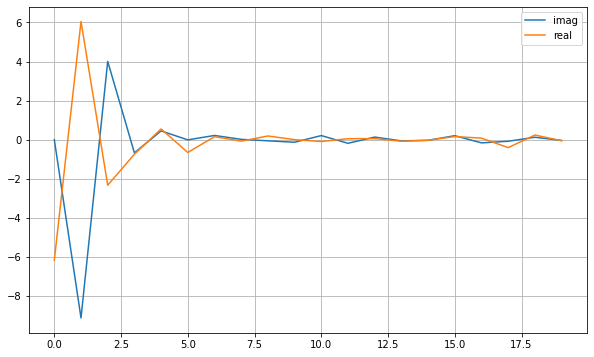

rg


<Figure size 432x288 with 0 Axes>

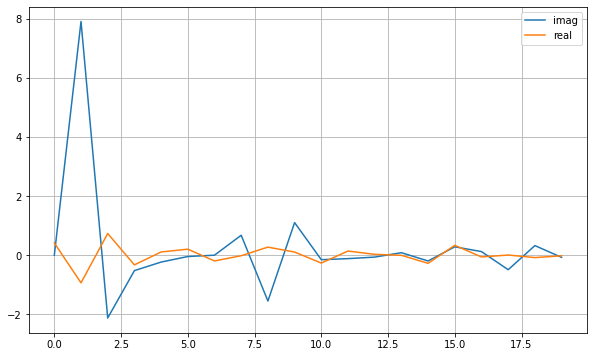

rb


<Figure size 432x288 with 0 Axes>

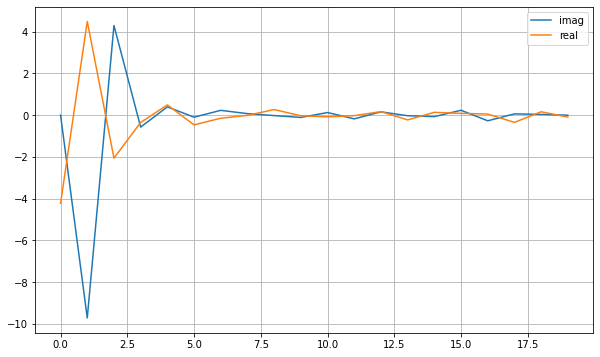

20202Q
ng


<Figure size 432x288 with 0 Axes>

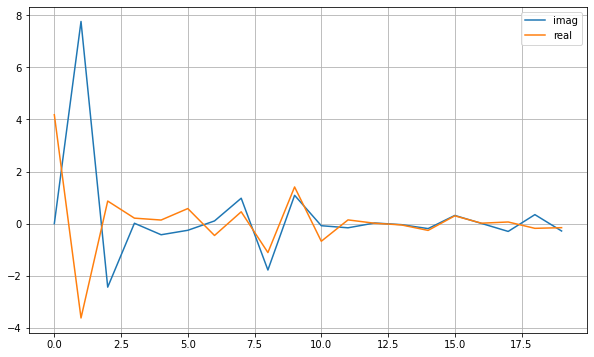

nb


<Figure size 432x288 with 0 Axes>

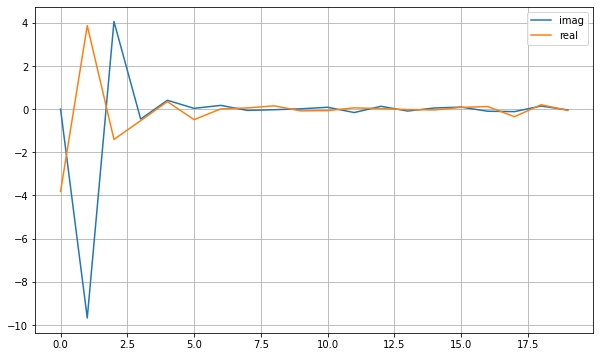

rg


<Figure size 432x288 with 0 Axes>

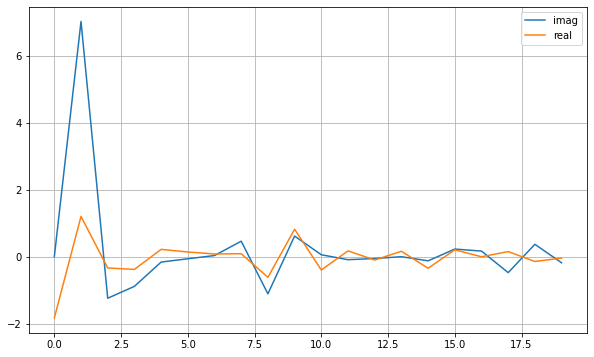

rb


<Figure size 432x288 with 0 Axes>

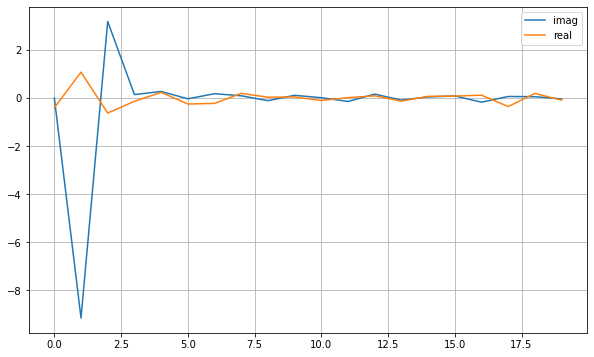

20203Q
ng


<Figure size 432x288 with 0 Axes>

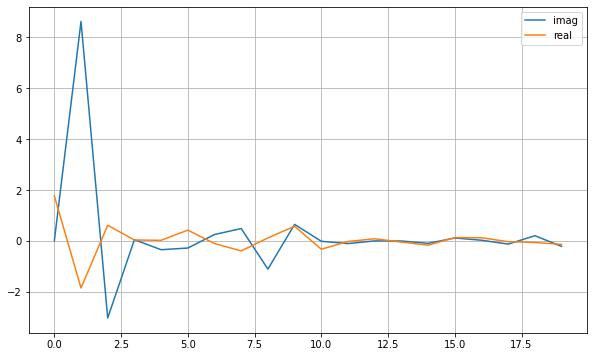

nb


<Figure size 432x288 with 0 Axes>

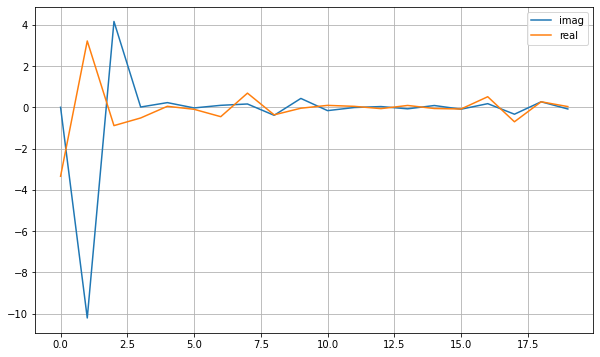

rg


<Figure size 432x288 with 0 Axes>

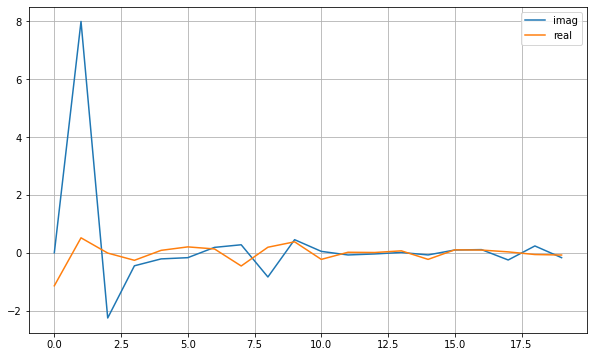

rb


<Figure size 432x288 with 0 Axes>

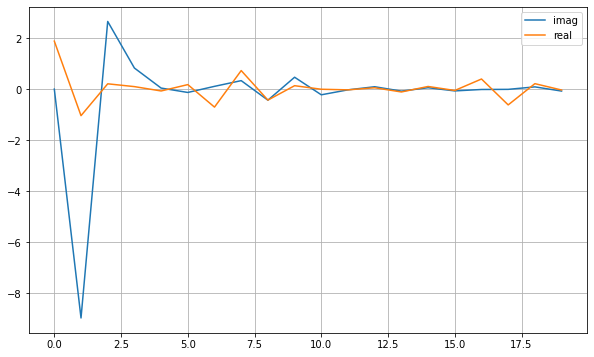

20204Q
ng


<Figure size 432x288 with 0 Axes>

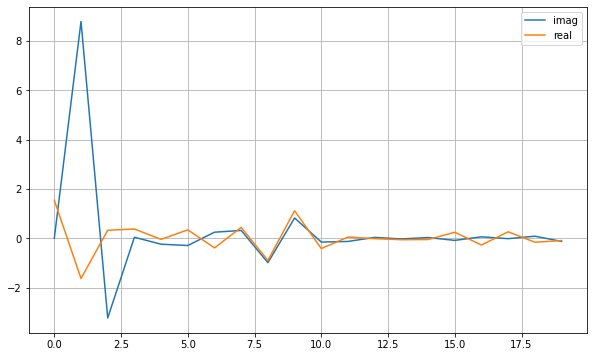

nb


<Figure size 432x288 with 0 Axes>

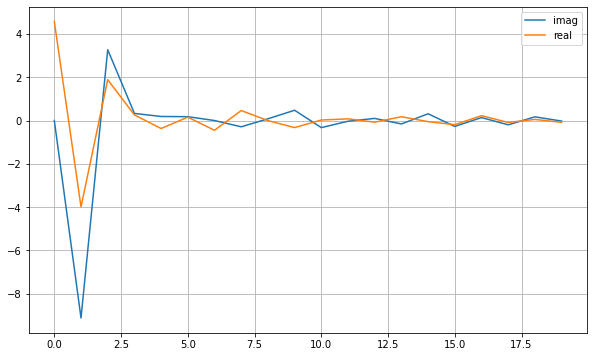

rg


<Figure size 432x288 with 0 Axes>

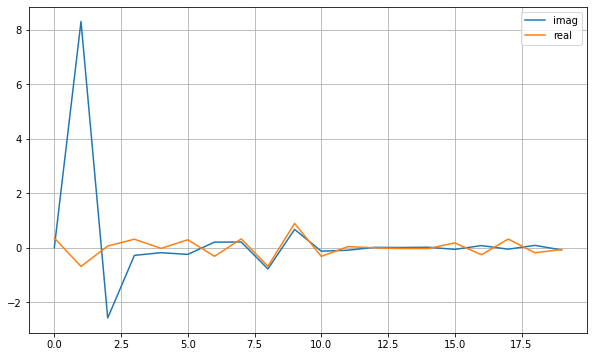

rb


<Figure size 432x288 with 0 Axes>

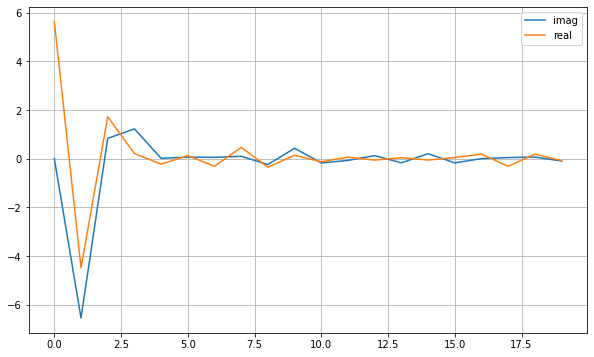

20211Q
ng


<Figure size 432x288 with 0 Axes>

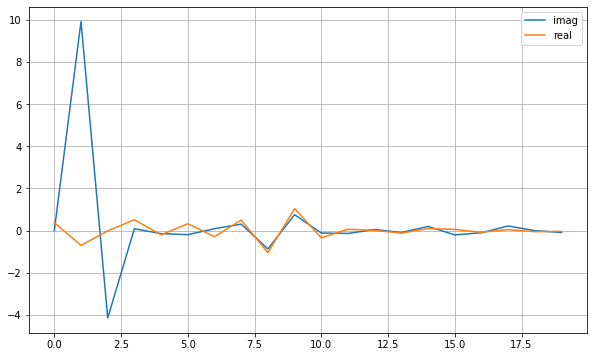

nb


<Figure size 432x288 with 0 Axes>

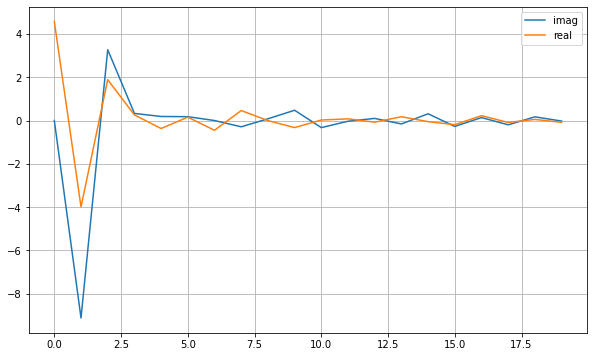

rg


<Figure size 432x288 with 0 Axes>

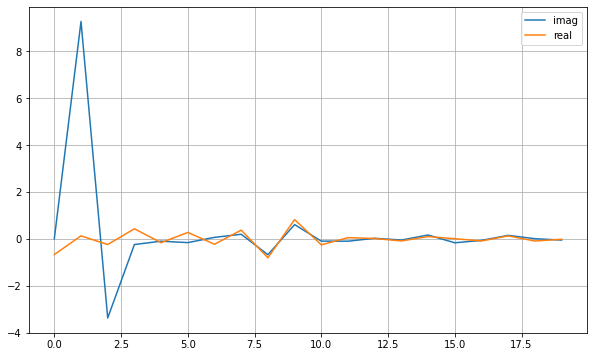

rb


<Figure size 432x288 with 0 Axes>

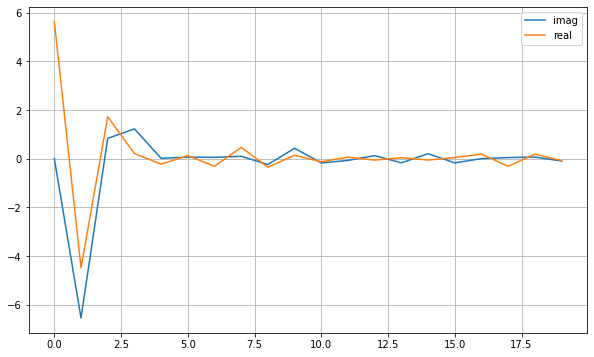

20212Q
ng


<Figure size 432x288 with 0 Axes>

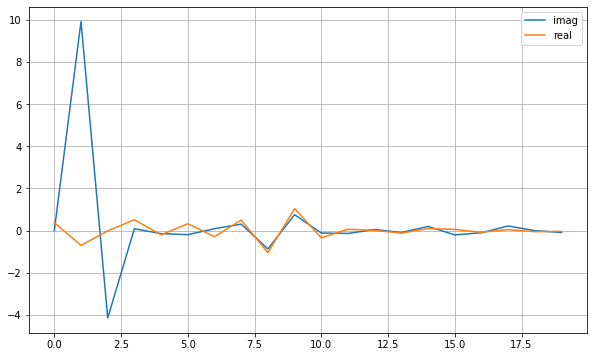

nb


<Figure size 432x288 with 0 Axes>

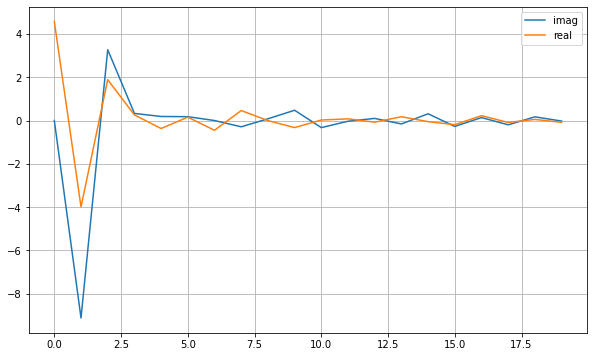

rg


<Figure size 432x288 with 0 Axes>

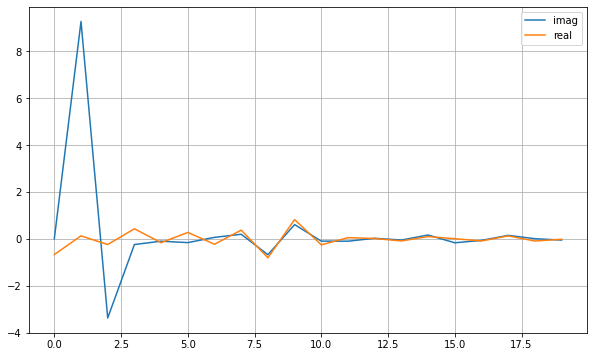

rb


<Figure size 432x288 with 0 Axes>

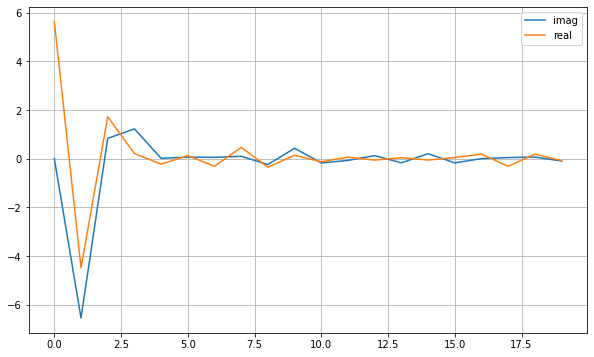

20213Q
ng


<Figure size 432x288 with 0 Axes>

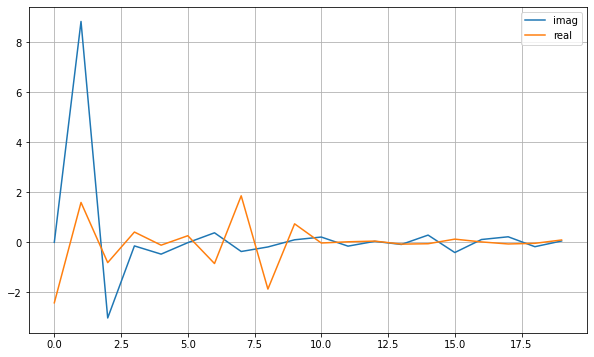

nb


<Figure size 432x288 with 0 Axes>

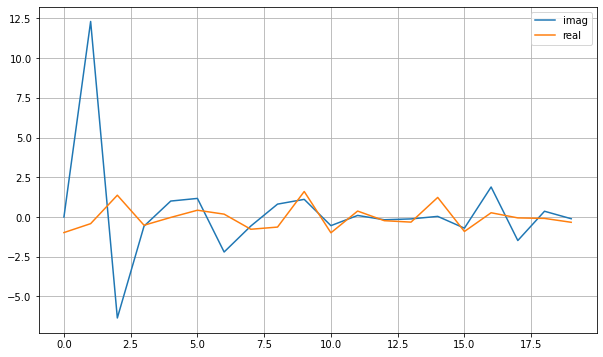

rg


<Figure size 432x288 with 0 Axes>

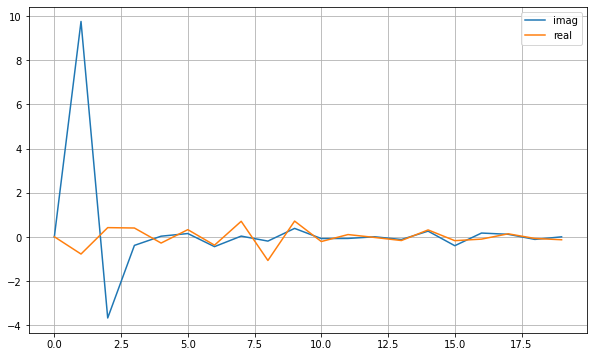

rb


<Figure size 432x288 with 0 Axes>

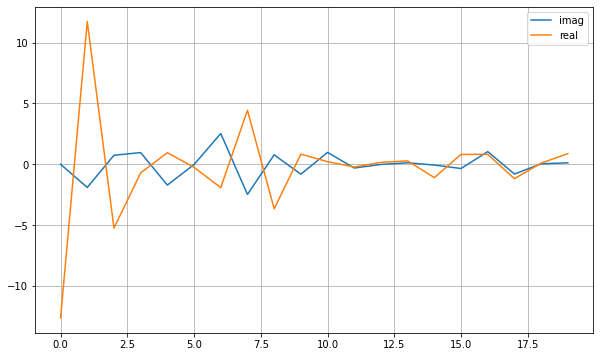

20214Q
ng


<Figure size 432x288 with 0 Axes>

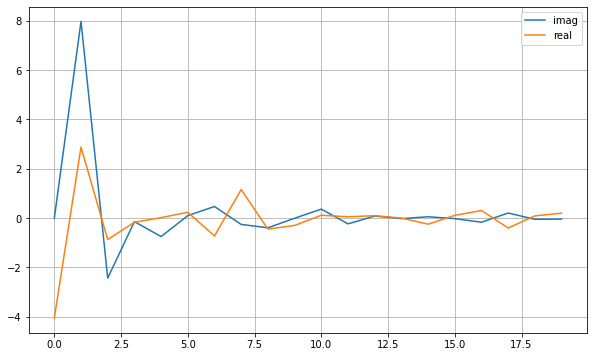

nb


<Figure size 432x288 with 0 Axes>

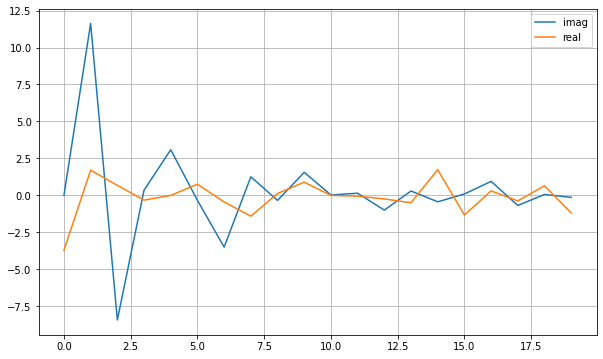

rg


<Figure size 432x288 with 0 Axes>

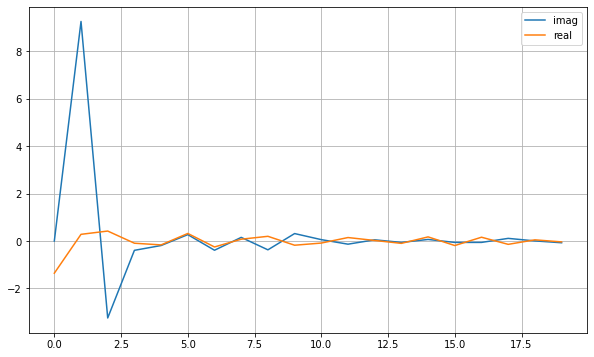

rb


<Figure size 432x288 with 0 Axes>

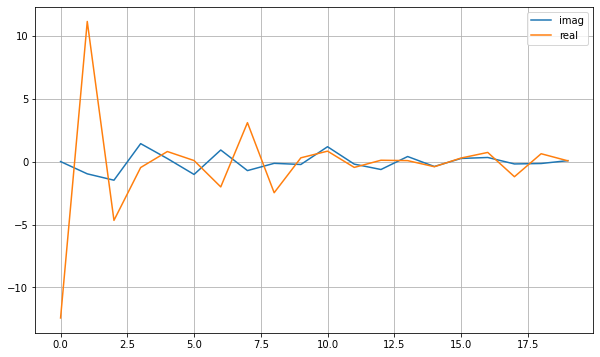

In [53]:
for idx,key in enumerate(F_lis_dict):
    F_list = F_lis_dict[key]
    print(key)
    for idx,F in enumerate(F_list):
        
        plt.clf()
        fig, ax = plt.subplots(figsize=(10, 6), facecolor="w")
        
        if idx==0:
            label='ng'
        elif idx == 1:
            label='nb'
        elif idx == 2:
            label='rg'
        elif idx == 3:
            label='rb'
            
        print(label)
        ax.plot(F.imag,label='imag')
        ax.plot(F.real,label='real')
        ax.grid()
        ax.legend()
        plt.show()

In [99]:
total_profit = 0
mean_profit = 0
mean_profit_rate = 0
total_profit_rate = 0
for idx,key in enumerate(trade_dict):
    print(key)
    print(trade_dict[key])
    td = trade_dict[key]
    total_profit += td['total_profit'].values[0]
    total_profit_rate += td['profit rate'].values[0]
    
mean_profit = total_profit/(idx+1)
mean_profit_rate = (total_profit_rate)/(idx+1)

print('total profit :{0}'.format(total_profit))
print('mean profit :{0}'.format(mean_profit))
print('total profit rate :{0}'.format(total_profit_rate))
print('mean profit rate : {0}'.format(mean_profit_rate))

2011
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1        -293.0       -11.72           22        32.0      -162.0   

   mean_profit  cant_buy_count  
1   -13.318182               0  
2012
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1          99.0         3.96           11        73.0       -39.0   

   mean_profit  cant_buy_count  
1          9.0               0  
2013
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         253.0        10.12           19        74.0       -31.0   

   mean_profit  cant_buy_count  
1    13.315789               0  
2014
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1        -127.0        -5.08            8        77.0      -105.0   

   mean_profit  cant_buy_count  
1      -15.875               0  
2015
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         196.0         7.84           13       119.0       -60.0   

   mean_profit  

year : 2011
--------------------
1
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.263158      0.294118            0.28             0.2       0.25   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.388889     0.157895    20.0      18.0      19.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

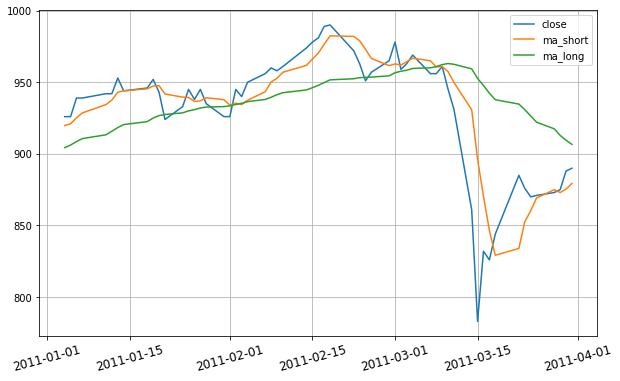

--------------------
4
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1          18.0         0.72            2        18.0         0.0   

   mean_profit  cant_buy_count  
1          9.0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.344828      0.222222        0.333333             0.4   0.111111   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.470588     0.434783    18.0      17.0      23.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

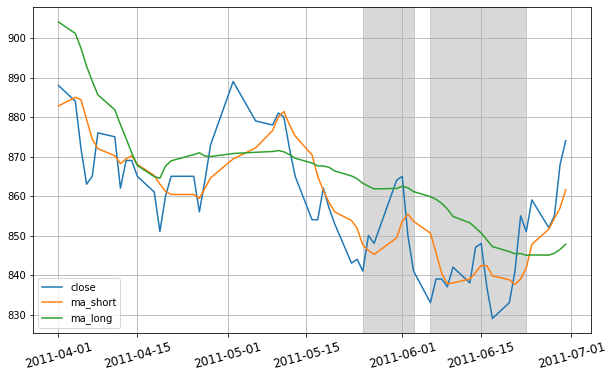

--------------------
7
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         -67.0        -2.68            4         6.0       -32.0   

   mean_profit  cant_buy_count  
1       -16.75               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.333333           0.2          0.3125        0.413793   0.157895   

   Stay recall  Down recall  up_num  stay_num  down_num  
0       0.3125         0.48    19.0      16.0      25.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

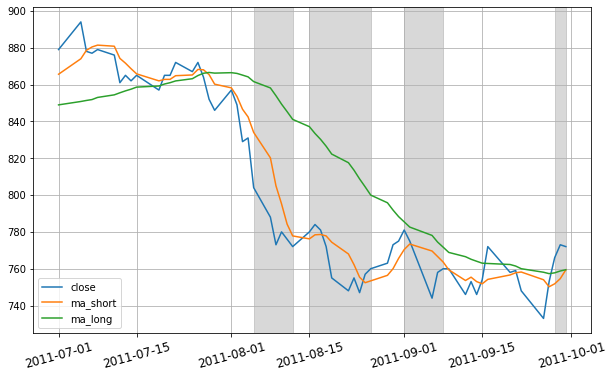

--------------------
10
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1           2.0         0.08            2         5.0        -3.0   

   mean_profit  cant_buy_count  
1          1.0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.327586      0.222222             0.2             0.4        0.2   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.071429     0.583333    20.0      14.0      24.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

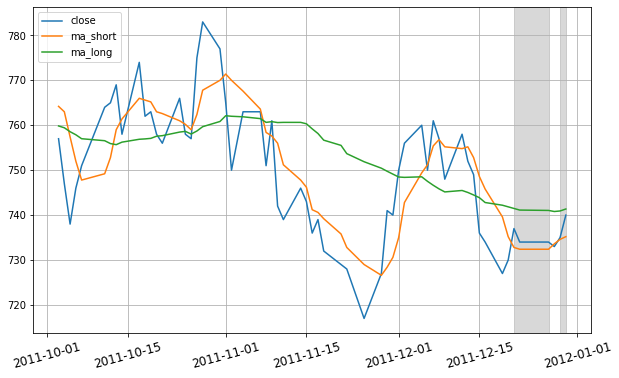

year : 2012
--------------------
1
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1          81.0         3.24            5        76.0        -7.0   

   mean_profit  cant_buy_count  
1         16.2               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.482759      0.482759            0.52            0.25   0.666667   

   Stay recall  Down recall  up_num  stay_num  down_num  
0         0.65     0.058824    21.0      20.0      17.0  

trigger_count : 1


<Figure size 432x288 with 0 Axes>

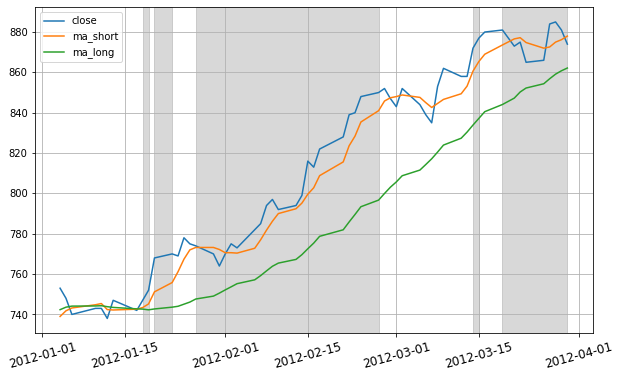

--------------------
4
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         -43.0        -1.72            4        -4.0       -18.0   

   mean_profit  cant_buy_count  
1       -10.75               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.338983      0.333333          0.1875        0.411765   0.166667   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.214286     0.518519    18.0      14.0      27.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

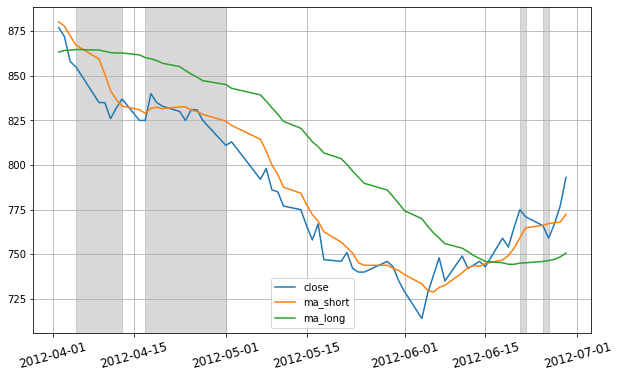

--------------------
7
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1          14.0         0.56            3         9.0         0.0   

   mean_profit  cant_buy_count  
1     4.666667               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.316667      0.294118        0.416667        0.290323   0.263158   

   Stay recall  Down recall  up_num  stay_num  down_num  
0         0.25     0.428571    19.0      20.0      21.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

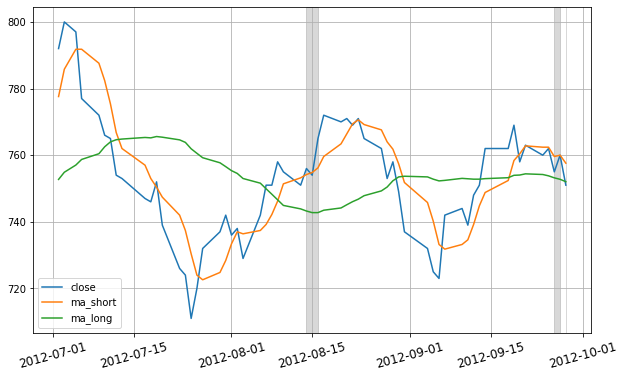

--------------------
10
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         -10.0         -0.4            3         1.0        -7.0   

   mean_profit  cant_buy_count  
1    -3.333333               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.298246      0.294118            0.32        0.266667   0.217391   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.380952     0.307692    23.0      21.0      13.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

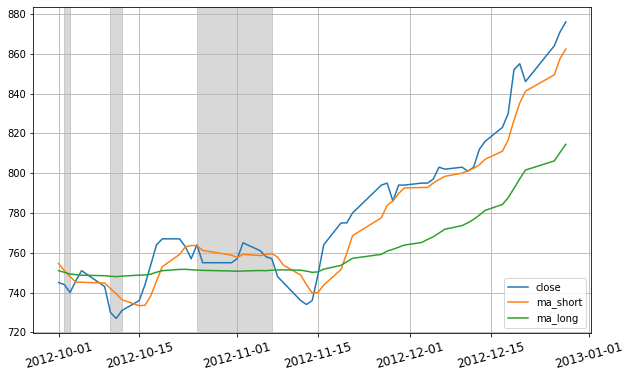

year : 2013
--------------------
1
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         172.0         6.88            5        71.0        16.0   

   mean_profit  cant_buy_count  
1         34.4               0  

   score  Up precision  Stay precision  Down precision  Up recall  \
0    0.5      0.512821             0.4             0.6   0.714286   

   Stay recall  Down recall  up_num  stay_num  down_num  
0          0.4       0.1875    28.0      10.0      16.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

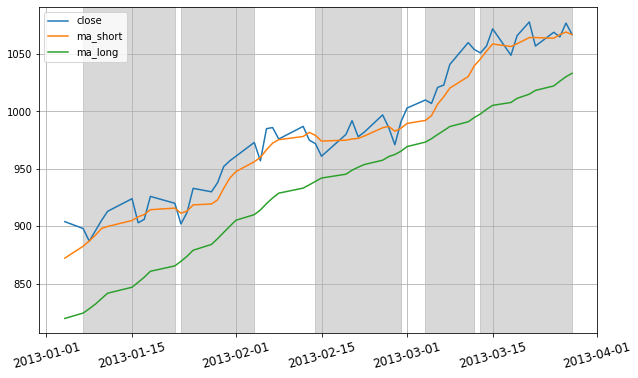

--------------------
4
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         110.0          4.4            6       160.0      -162.0   

   mean_profit  cant_buy_count  
1    18.333333               0  

   score  Up precision  Stay precision  Down precision  Up recall  \
0    0.4      0.481481        0.153846            0.45        0.5   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.142857         0.45    26.0      14.0      20.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

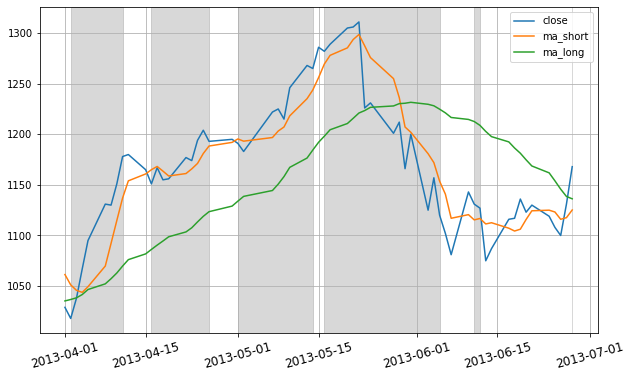

--------------------
7
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         -39.0        -1.56            4        47.0       -64.0   

   mean_profit  cant_buy_count  
1        -9.75               0  

   score  Up precision  Stay precision  Down precision  Up recall  \
0    0.3           0.3        0.176471        0.391304    0.26087   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.176471         0.45    23.0      17.0      20.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

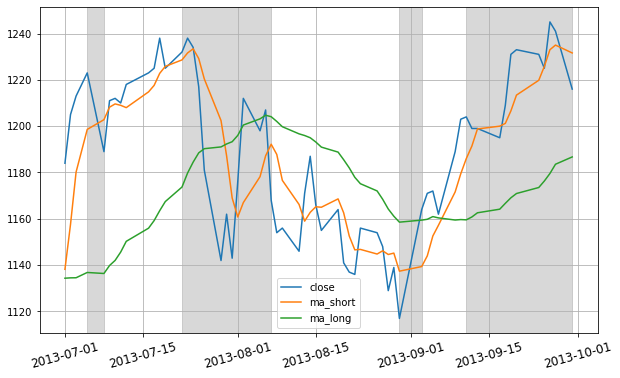

--------------------
10
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1          33.0         1.32            5        32.0       -31.0   

   mean_profit  cant_buy_count  
1          6.6               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.305085          0.35        0.357143        0.090909       0.28   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.588235     0.058824    25.0      17.0      17.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

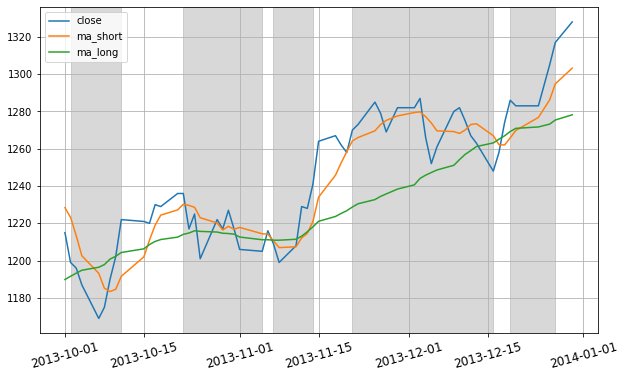

year : 2014
--------------------
1
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.327273      0.285714             0.0        0.413793        0.3   

   Stay recall  Down recall  up_num  stay_num  down_num  
0          0.0          0.5    20.0      11.0      24.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

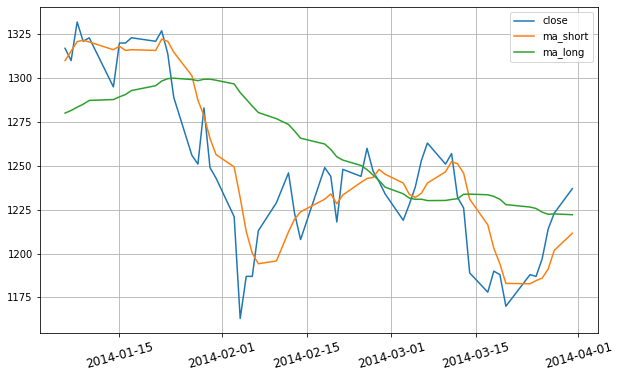

--------------------
4
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.322034      0.285714        0.416667        0.214286   0.333333   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.416667     0.176471    18.0      24.0      17.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

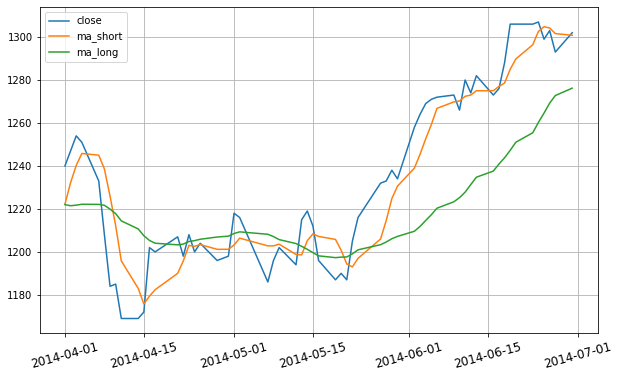

--------------------
7
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.483333      0.333333        0.577778        0.111111   0.133333   

   Stay recall  Down recall  up_num  stay_num  down_num  
0      0.83871     0.071429    15.0      31.0      14.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

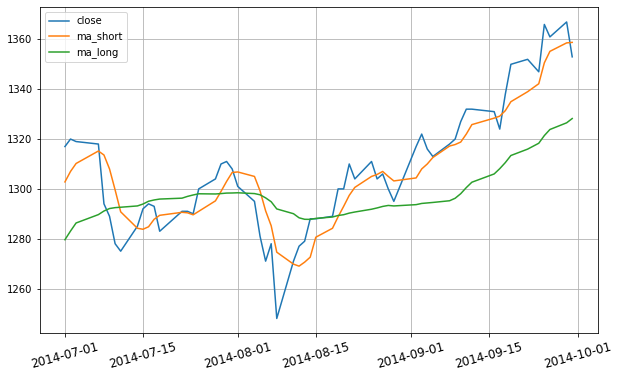

--------------------
10
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.275862          0.24        0.352941            0.25   0.285714   

   Stay recall  Down recall  up_num  stay_num  down_num  
0          0.3     0.235294    21.0      20.0      17.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

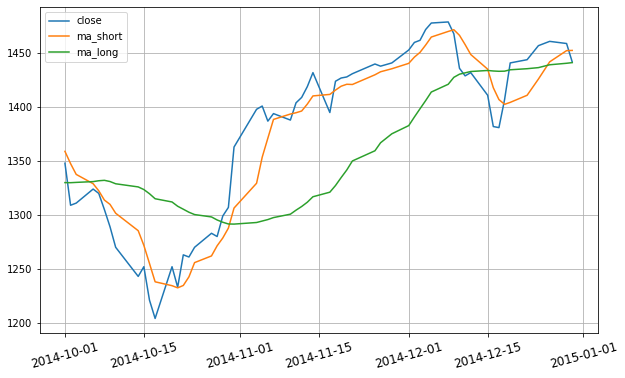

year : 2015
--------------------
1
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1          48.0         1.92            2        34.0        14.0   

   mean_profit  cant_buy_count  
1         24.0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.368421           0.3        0.481481             0.2   0.333333   

   Stay recall  Down recall  up_num  stay_num  down_num  
0         0.52     0.142857    18.0      25.0      14.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

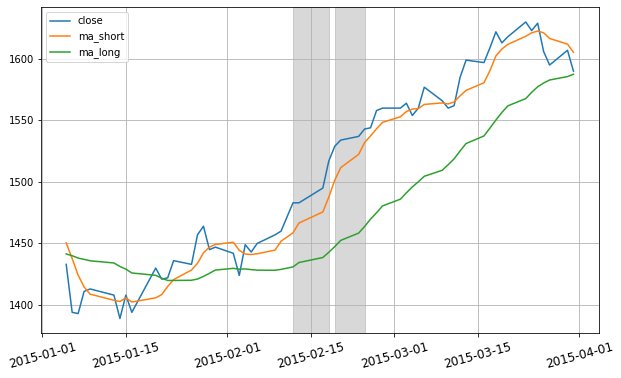

--------------------
4
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1          65.0          2.6            1        65.0        65.0   

   mean_profit  cant_buy_count  
1         65.0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.344828      0.307692        0.428571             0.1   0.210526   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.555556     0.083333    19.0      27.0      12.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

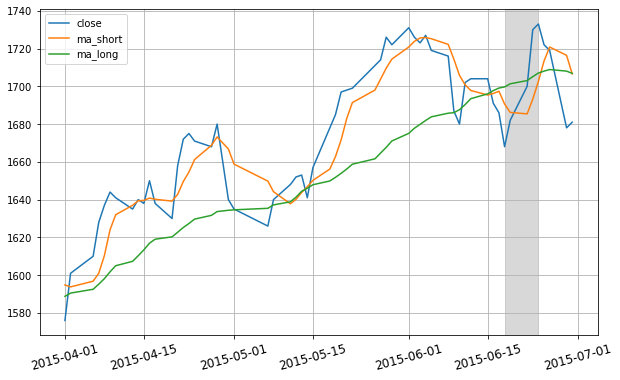

--------------------
7
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1          11.0         0.44            4        58.0       -60.0   

   mean_profit  cant_buy_count  
1         2.75               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.389831      0.428571        0.363636        0.391304        0.3   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.470588     0.409091    20.0      17.0      22.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

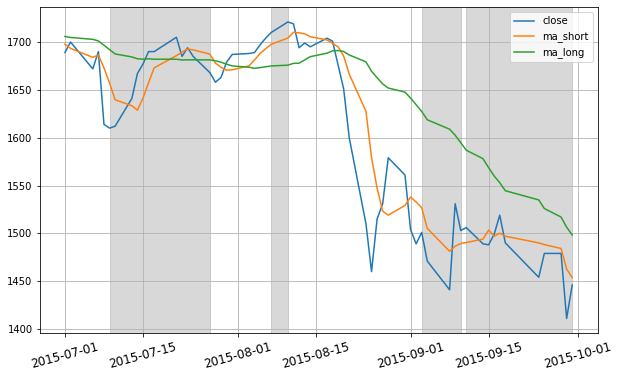

--------------------
10
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1           3.0         0.12            3        22.0       -14.0   

   mean_profit  cant_buy_count  
1          1.0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.327586         0.375        0.285714             0.3   0.409091   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.235294     0.315789    22.0      17.0      19.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

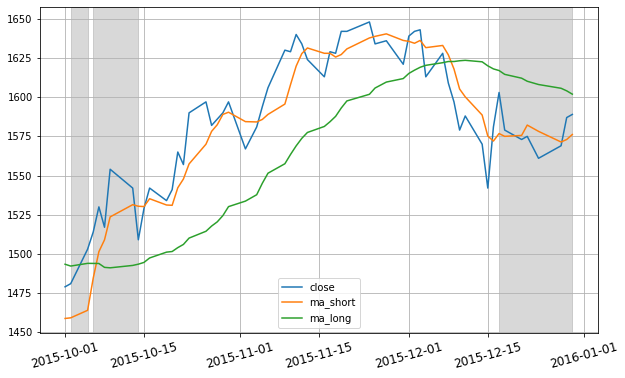

year : 2016
--------------------
1
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1          30.0          1.2            5        53.0       -77.0   

   mean_profit  cant_buy_count  
1          6.0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.526316         0.375        0.333333        0.605263   0.352941   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.166667     0.676471    17.0       6.0      34.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

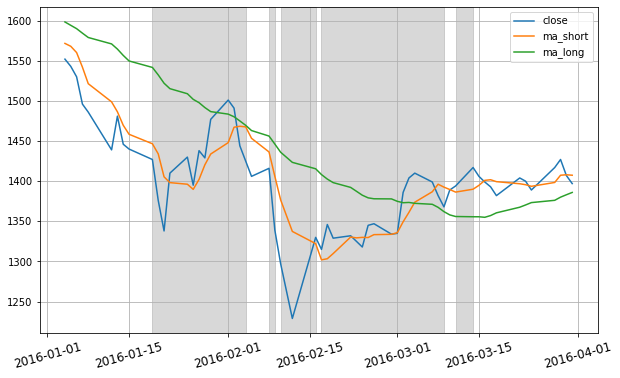

--------------------
4
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         -14.0        -0.56            2        -2.0       -12.0   

   mean_profit  cant_buy_count  
1         -7.0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.322034          0.35             0.5        0.222222   0.318182   

   Stay recall  Down recall  up_num  stay_num  down_num  
0          0.3     0.352941    22.0      20.0      17.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

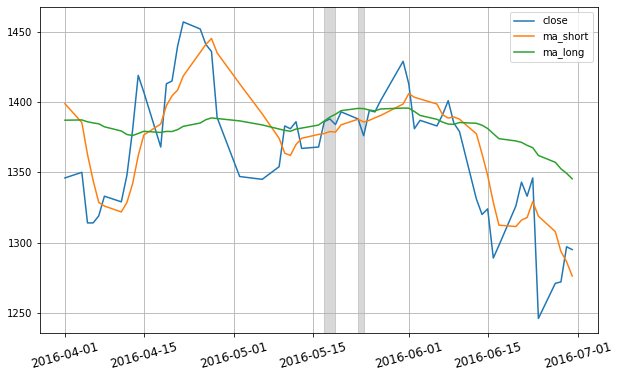

--------------------
7
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.338983      0.307692          0.3125        0.411765   0.380952   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.263158     0.368421    21.0      19.0      19.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

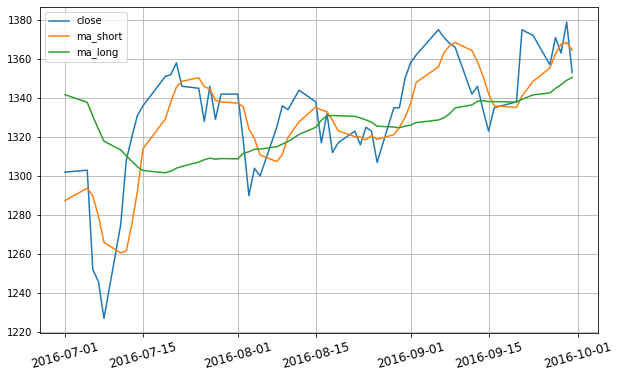

--------------------
10
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1          20.0          0.8            1        20.0        20.0   

   mean_profit  cant_buy_count  
1         20.0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.362069          0.32             0.5             0.0        0.4   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.448276          0.0    20.0      29.0       9.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

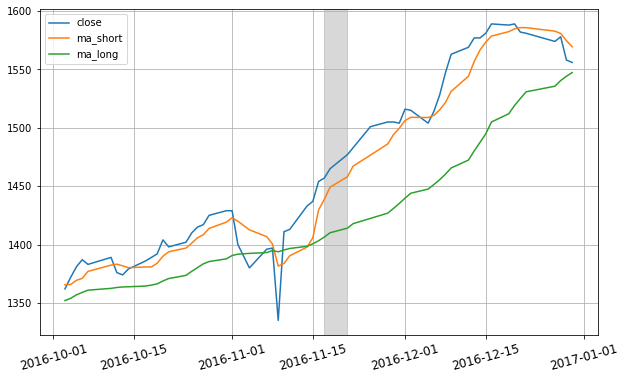

year : 2017
--------------------
1
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.310345           0.2        0.384615        0.111111      0.125   

   Stay recall  Down recall  up_num  stay_num  down_num  
0          0.6     0.058824    16.0      25.0      17.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

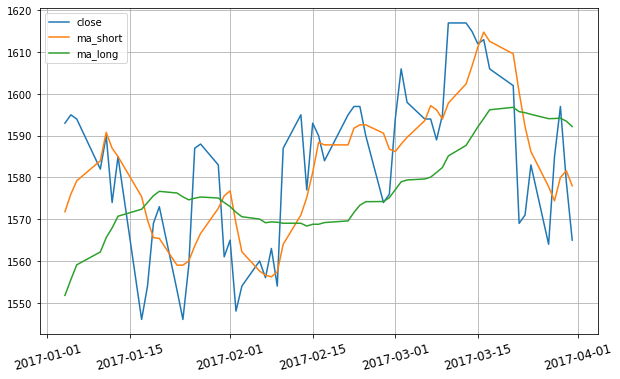

--------------------
4
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.440678      0.181818        0.617647        0.214286      0.125   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.636364          0.3    16.0      33.0      10.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

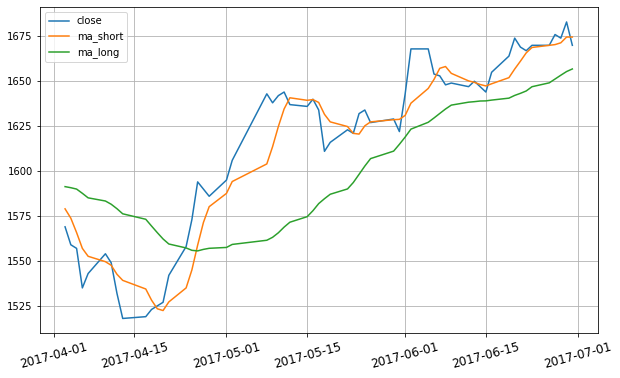

--------------------
7
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.525424          0.25        0.630435        0.111111   0.083333   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.783784          0.1    12.0      37.0      10.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

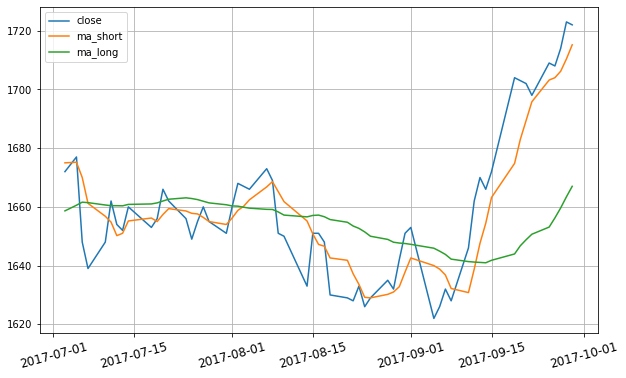

--------------------
10
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.540984      0.166667        0.666667            0.25   0.133333   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.769231     0.142857    15.0      39.0       7.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

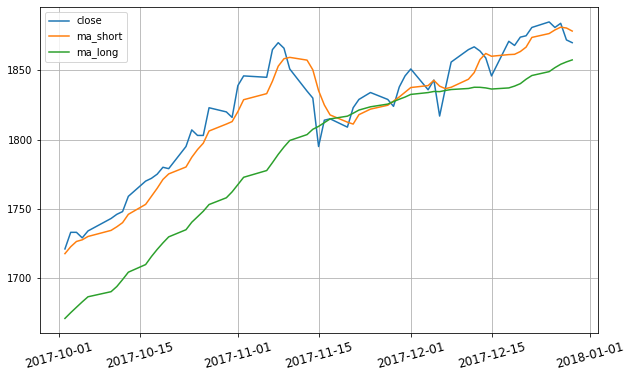

year : 2018
--------------------
1
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.344828      0.333333            0.35        0.347826   0.277778   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.368421     0.380952    18.0      19.0      21.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

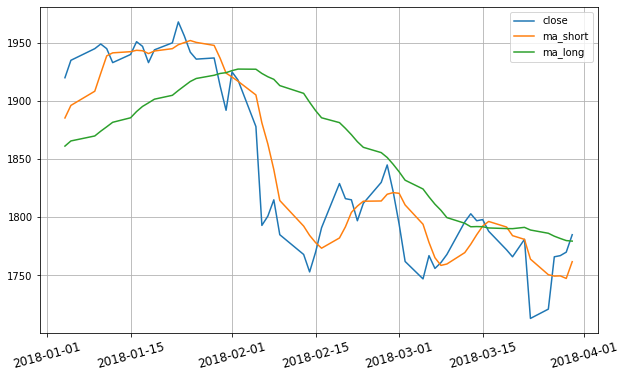

--------------------
4
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.491803          0.25        0.659091             0.0   0.111111   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.690476          0.0     9.0      42.0      10.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

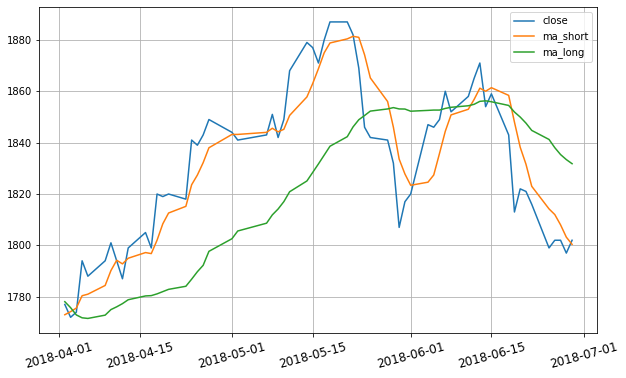

--------------------
7
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.213115      0.272727            0.24            0.16   0.142857   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.285714     0.210526    21.0      21.0      19.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

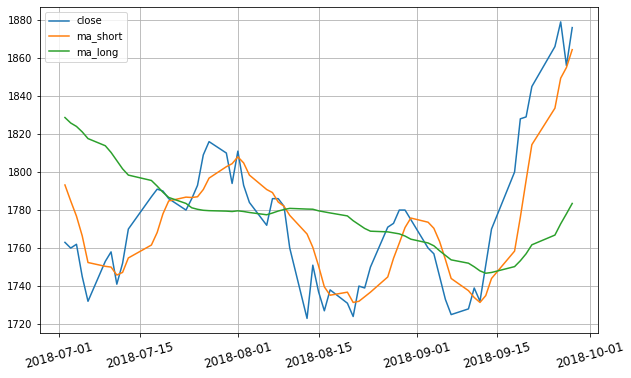

--------------------
10
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.327869      0.157895        0.111111        0.484848   0.176471   

   Stay recall  Down recall  up_num  stay_num  down_num  
0       0.0625     0.571429    17.0      16.0      28.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

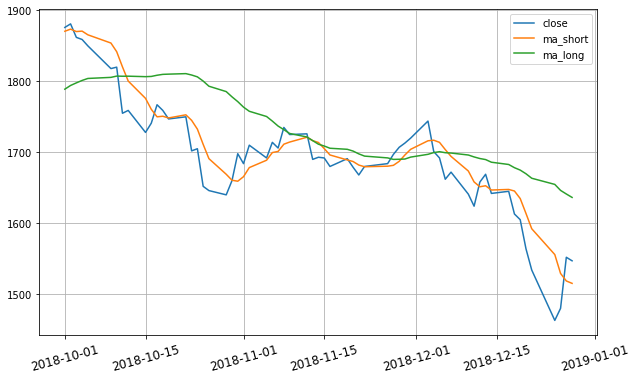

year : 2019
--------------------
1
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1          71.0         2.84            7        44.0       -23.0   

   mean_profit  cant_buy_count  
1    10.142857               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.350877      0.466667         0.37037             0.2   0.333333   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.454545     0.214286    21.0      22.0      14.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

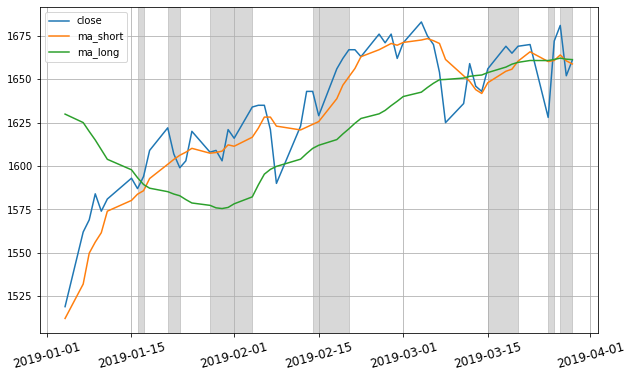

--------------------
4
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         -11.0        -0.44            3        16.0       -27.0   

   mean_profit  cant_buy_count  
1    -3.666667               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.396552           0.0        0.542857        0.222222        0.0   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.575758     0.235294     8.0      33.0      17.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

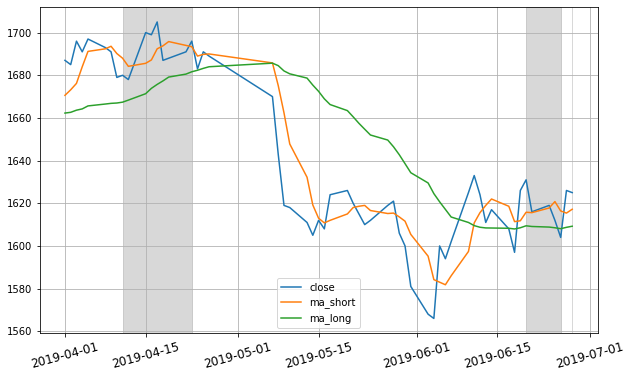

--------------------
7
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         -97.0        -3.88            6        15.0       -49.0   

   mean_profit  cant_buy_count  
1   -16.166667               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.393443      0.277778             0.5        0.333333   0.294118   

   Stay recall  Down recall  up_num  stay_num  down_num  
0          0.5       0.3125    17.0      28.0      16.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

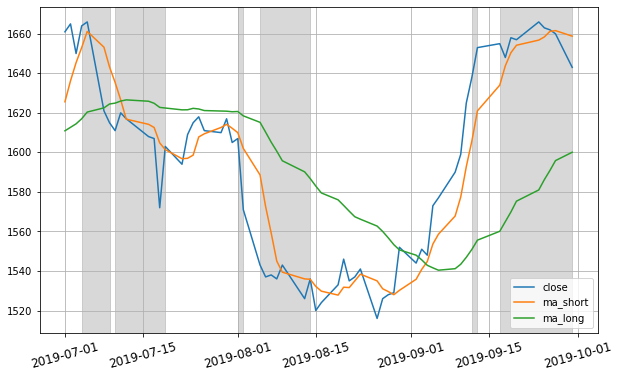

--------------------
10
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         111.0         4.44            4        49.0        -9.0   

   mean_profit  cant_buy_count  
1        27.75               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.590164           0.4        0.632653             0.5       0.25   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.861111     0.111111    16.0      36.0       9.0  

trigger_count : 2


<Figure size 432x288 with 0 Axes>

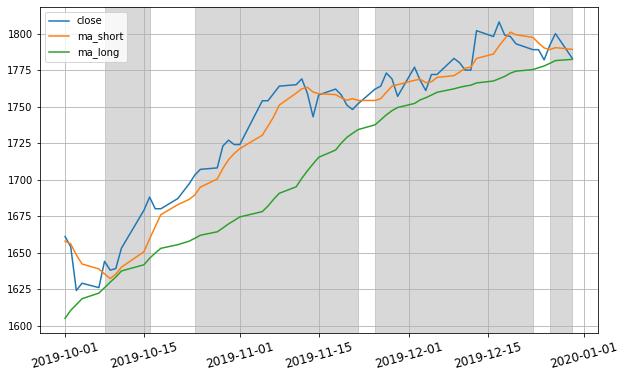

year : 2020
--------------------
1
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.403509           0.4        0.363636        0.433333   0.117647   

   Stay recall  Down recall  up_num  stay_num  down_num  
0          0.5     0.541667    17.0      16.0      24.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

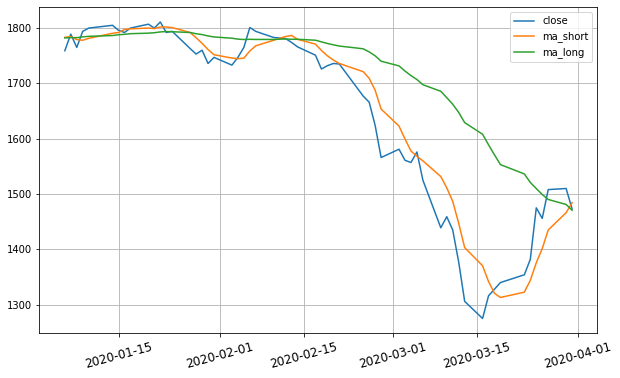

--------------------
4
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.366667      0.348837        0.454545        0.333333   0.652174   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.263158     0.111111    23.0      19.0      18.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

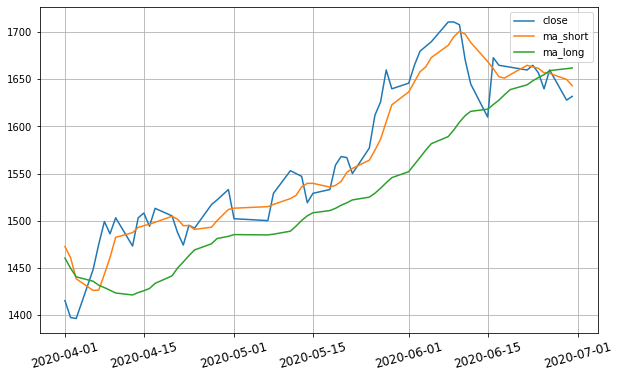

--------------------
7
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.316667          0.25        0.354839        0.294118   0.176471   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.458333     0.263158    17.0      24.0      19.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

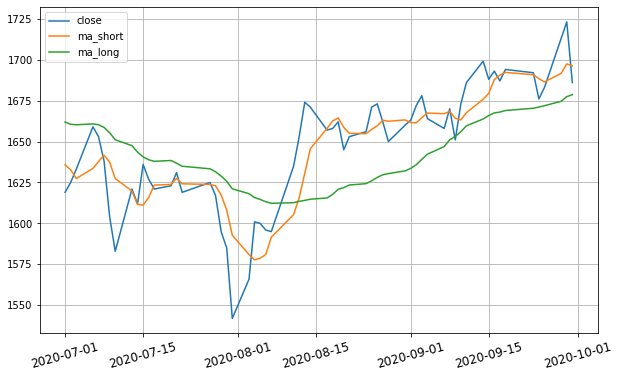

--------------------
10
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         186.0         7.44            3       128.0         2.0   

   mean_profit  cant_buy_count  
1         62.0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.311475      0.181818        0.407407        0.333333        0.2   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.407407     0.285714    20.0      27.0      14.0  

trigger_count : 1


<Figure size 432x288 with 0 Axes>

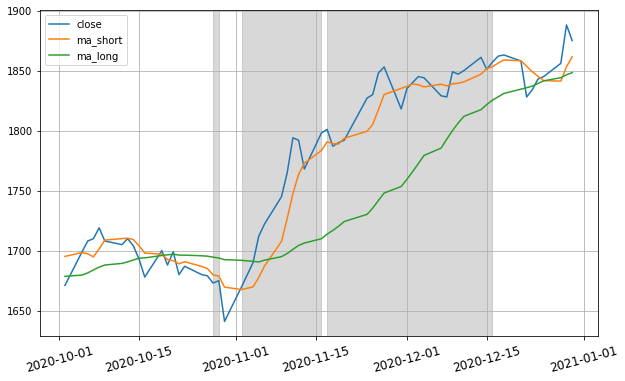

year : 2021
--------------------
1
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1          64.0         2.56            1        64.0        64.0   

   mean_profit  cant_buy_count  
1         64.0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.305085      0.321429        0.428571             0.0   0.391304   

   Stay recall  Down recall  up_num  stay_num  down_num  
0         0.45          0.0    23.0      20.0      16.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

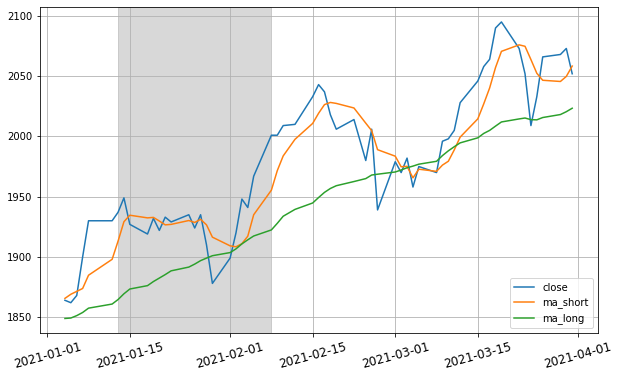

--------------------
4
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.316667      0.111111            0.44        0.269231   0.066667   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.423077     0.368421    15.0      26.0      19.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

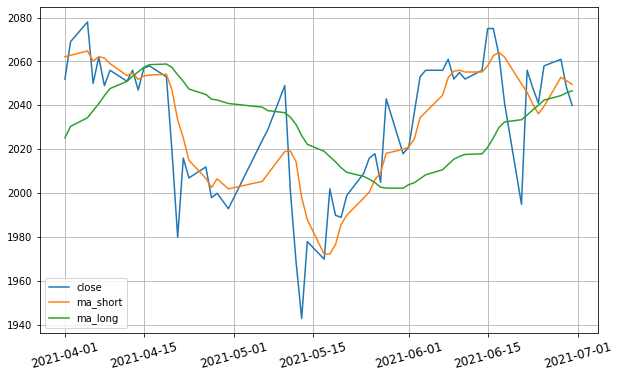

--------------------
7
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1          72.0         2.88            1        72.0        72.0   

   mean_profit  cant_buy_count  
1         72.0               0  

   score  Up precision  Stay precision  Down precision  Up recall  \
0    0.3          0.25        0.411765         0.26087   0.238095   

   Stay recall  Down recall  up_num  stay_num  down_num  
0         0.35     0.315789    21.0      20.0      19.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

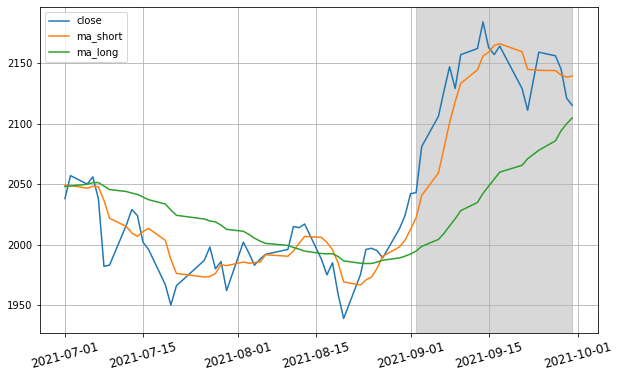

--------------------
10
   total_profit  profit rate  trade_count  max_profit  min_profit  \
1             0          0.0            0           0           0   

   mean_profit  cant_buy_count  
1            0               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.254237      0.142857        0.318182         0.26087   0.133333   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.318182     0.272727    15.0      22.0      22.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

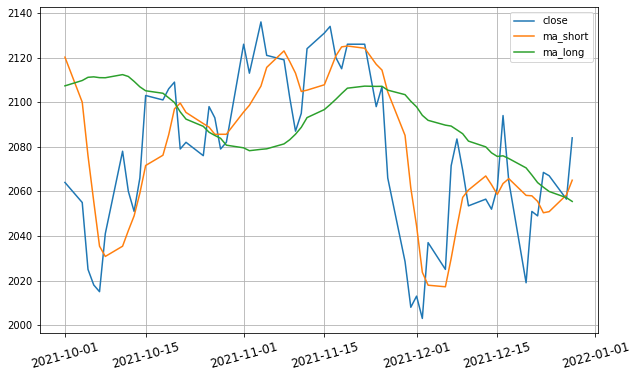

In [67]:
for idx,key in enumerate(ffs_dict):
    print('year :',key)
    for month in [1,4,7,10]:
        print("--------------------")
        print(month)
        ffs = ffs_dict[key]
        year = int(key)
        ffs.simulate(path_tpx,path_daw,start_year=year,end_year=year,start_month=month,end_month=month+2)
    

# high pass 実装

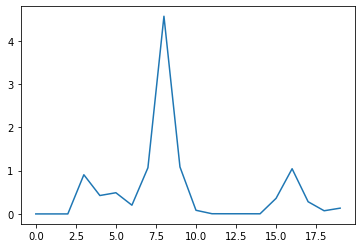

In [17]:
plt.plot(ffs.Fstrategies[0].spectrum)

スペクトルの差分をとって強調すればわかりやすいんじゃね？

# make_spectrum 直す

In [165]:
ffs_dict

{2017: <my_library.library.FFTSimulation at 0x14b90e35880>,
 2018: <my_library.library.FFTSimulation at 0x14b900cf190>,
 2019: <my_library.library.FFTSimulation at 0x14b9300c1f0>,
 2020: <my_library.library.FFTSimulation at 0x14b90cbcc10>}

In [9]:
while 1:
    try:
        1/0
        print(1)
    except:
        print(2)
        break
    print(3)

2


# normal plot spectrum

0 : normal good \
1 : normal bad \
2 : reverse good \
3 : reverse bad

離散的なプロットのしかた

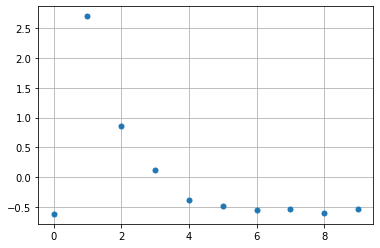

In [31]:
plt.plot(ffs.Fstrategies[0].spectrum,'.',markersize=10)
plt.grid()

# ケプストラム分析

In [53]:

# リニア値をdB変換
def db(x, dBref):
    delta = 10**-7
    x += delta
    y = 20 * np.log10(x / dBref)                      # リニア値をdB値に変換
    return y                                          # dB値を返す


In [39]:
def return_ceps_norm(spectrum):

    # ケプストラム分析
    spec_db = db(spectrum, 2e-5)                              # スペクトルを対数(dB)にする(0dB=20[μPa])
    ceps_db = np.real(fftpack.ifft(spec_db))                # 対数スペクトルを逆フーリエ変換してケプストラム波形を作る
    ceps_db_low = fftpack.fft(ceps_db) 
    ceps_norm = norm(ceps_db_low)                           # ケプストラム波形を再度フーリエ変換してスペクトル包絡を得る
    return ceps_norm



# Plot

power spectrum
st = 0


<Figure size 432x288 with 0 Axes>

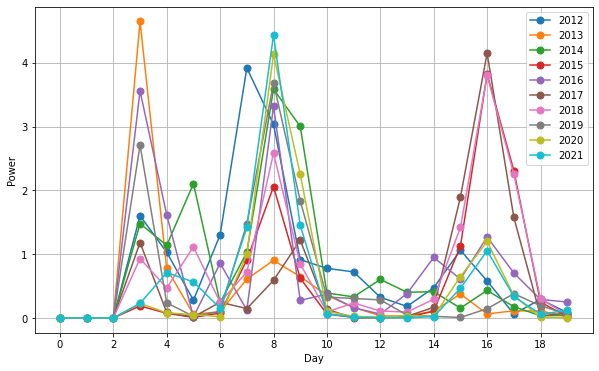

st = 1


<Figure size 432x288 with 0 Axes>

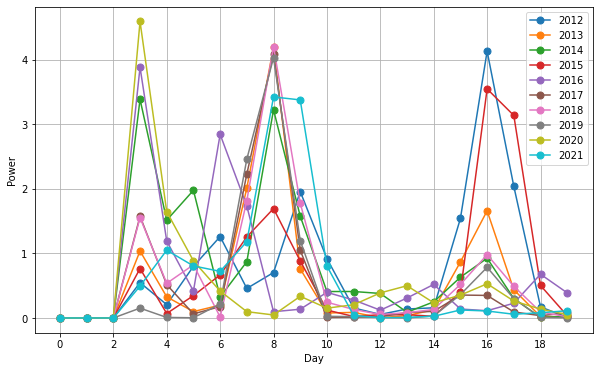

st = 2


<Figure size 432x288 with 0 Axes>

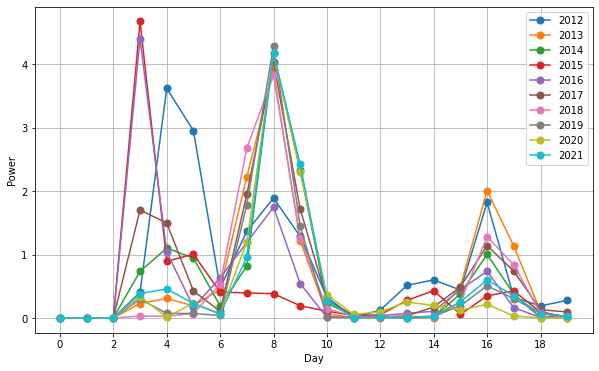

st = 3


<Figure size 432x288 with 0 Axes>

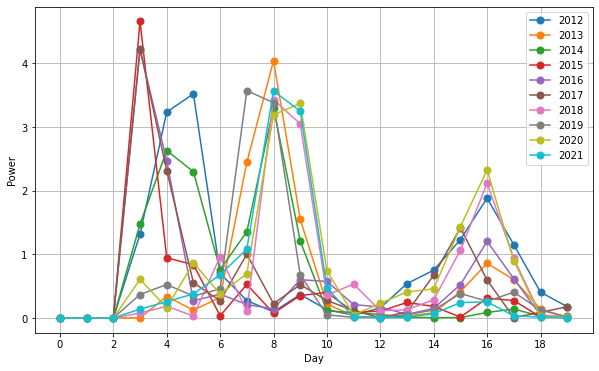

In [105]:
print("power spectrum")
for st in [0,1,2,3]:
    plt.clf()
    print("st =",st)
    fig, ax = plt.subplots(figsize=(10, 6), facecolor="w")
    # for year in [2018,2019,2020]:
    
    for idx,key in enumerate(ffs_dict):
        if key == '2011':
            continue
        spe =  ffs_dict[key].Fstrategies[st].spectrum
        ax.plot(spe,label=str(key),marker='o',markersize=7)
        
    ax.set_xlabel("Day")
    ax.set_ylabel("Power")
    ax.set_xticks(range(0,20,2))
    ax.legend()
    ax.grid()
    plt.show()

# 実部, 虚部で分けて考える

In [18]:
width  = 60
stride = 5
lx_dummy = LearnXGB(num_class=3)
x_train,y_train,_,_= lx_dummy.make_xgb_data(path_tpx,path_daw,test_rate=1.0)
_,_ ,x_test,y_test = lx_dummy.make_xgb_data(path_tpx,path_daw,test_rate=0.9)

FFT_obj = FFT_winSimulation

value_dict = {}
ffs_dummy = FFTSimulation(lx_dummy,None)
ffs_dict = {}
window_type = 'bla'
for year in [2017,2018,2019,2020,2021]:
    start_year = 2005
    end_year = year-2
    start_month = 1
    end_month = 12
    
    x_train_ = split_df(x_train,start_year,end_year,start_month,end_month)
    y_train_ = y_train[:len(x_train_)]
    lx = LearnXGB(num_class=3)
    lx.learn_xgb2(x_train_,y_train_,x_test,y_test,verbose=False)

    
    value_list = make_value_list(lx,year-1,year-1,path_tpx,path_daw,width=width,stride=stride)
    value_dict[year] = value_list
    x_ng,x_nb,x_rg,x_rb = return_clx(value_list)
    Fstrategies,Phases,F_list = return_ffs(lx,x_ng,x_nb,x_rg,x_rb,FFT_obj,width=width,stride=stride)
    
    ffs = FFT_obj(lx,Fstrategies,width=width,window_type=window_type)
    ffs.simulate(path_tpx,path_daw,start_year=year,end_year=year,start_month=start_month,end_month=end_month,is_validate=True)

    ffs_dict[year] = ffs
    # ffs.do_fft(wave_vec) -> F, np.abs(F)
    
    

C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, 

ng


<Figure size 432x288 with 0 Axes>

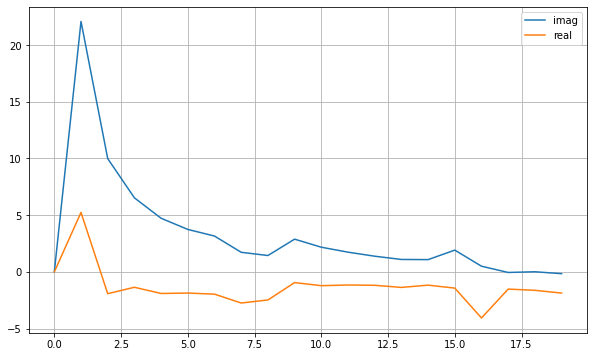

nb


<Figure size 432x288 with 0 Axes>

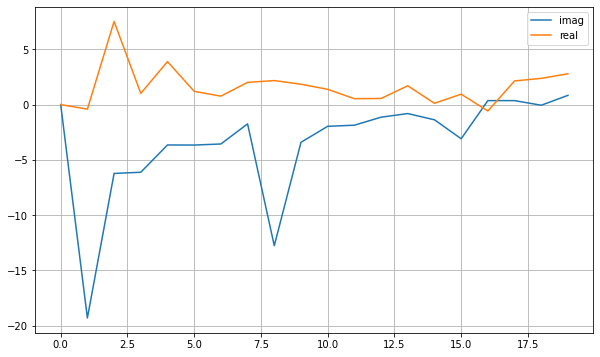

rg


<Figure size 432x288 with 0 Axes>

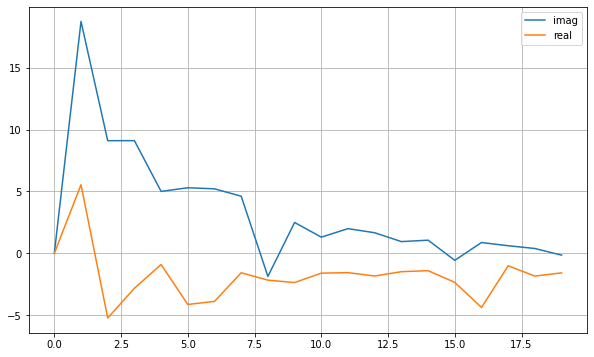

rb


<Figure size 432x288 with 0 Axes>

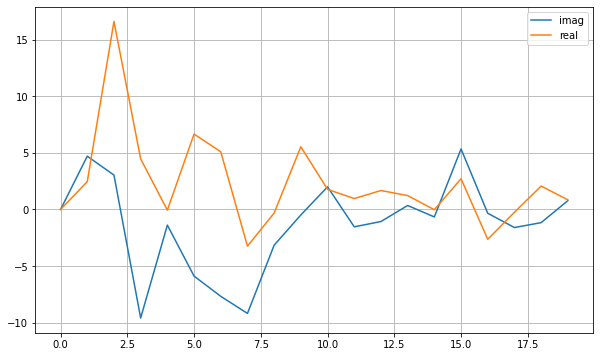

In [64]:

for idx,F in enumerate(F_list):
    
    plt.clf()
    fig, ax = plt.subplots(figsize=(10, 6), facecolor="w")
    
    if idx==0:
        label='ng'
    elif idx == 1:
        label='nb'
    elif idx == 2:
        label='rg'
    elif idx == 3:
        label='rb'
        
    print(label)
    ax.plot(F.imag,label='imag')
    ax.plot(F.real,label='real')
    ax.grid()
    ax.legend()
    plt.show()

# 1年単位の特徴ベクトルで, 四半期のシミュレーション

In [ ]:
total_prf = 0
prf = 0
for idx,key in enumerate(ffs_dict):
    ffs = ffs_dict[key]
    print("key :",key)
    for month in [1,4,7,10]:
        start_month = month
        end_month = month + 2
        year = int(key)
        start_year = year
        end_year = year
        if month==1:
            print('1Q')
        elif month==4:
            print('2Q')
        elif month==7:
            print('3Q')
        elif month==10:
            print('4Q')
            
        
        ffs.simulate(path_tpx,path_daw,start_year=start_year,end_year=end_year, \
            start_month=start_month,end_month=end_month,is_validate=True)
        trade_log = ffs.trade_log
        prf = trade_log['total_profit'].values[0]
        total_prf += prf
        # print(ffs.trade_log)
        
print(prf)

In [5]:
save_path = '/Users/Owner/Desktop/program/Sotsuron/code/wave_pickles/ffs_2012_2021.pickle'
ffs_dict = load_pickle(save_path)

In [8]:
ffs_dict['2012'].Fstrategies

[Fstrategy(strategy='normal', alpha=0.33, spectrum=array([1.00000000e-07, 1.00000000e-07, 1.00000000e-07, 1.60294083e+00,
        1.02876623e+00, 2.78849843e-01, 1.30324350e+00, 3.91935484e+00,
        3.03224829e+00, 9.14545257e-01, 7.77157118e-01, 7.22439492e-01,
        3.23978446e-01, 1.81626381e-01, 4.74163619e-01, 1.06184257e+00,
        5.80300494e-01, 6.24043526e-02, 2.91861207e-01, 8.48637155e-02])),
 Fstrategy(strategy='stay', alpha=0.33, spectrum=array([1.00000000e-07, 1.00000000e-07, 1.00000000e-07, 5.47106125e-01,
        2.06422666e-01, 7.99241194e-01, 1.25951233e+00, 4.57183957e-01,
        7.03332498e-01, 1.95660148e+00, 9.18851626e-01, 1.54706856e-01,
        5.53282500e-02, 1.38819540e-01, 1.57416460e-01, 1.53987832e+00,
        4.12927241e+00, 2.03715430e+00, 1.71363001e-01, 9.84704823e-03])),
 Fstrategy(strategy='reverse', alpha=0.33, spectrum=array([1.00000000e-07, 1.00000000e-07, 1.00000000e-07, 4.04581177e-01,
        3.62268620e+00, 2.95547366e+00, 4.72445320e-0

# ダメ出し　やること
1. 周波数領域に low pass filter をかける（高周波成分除去）　
2. 時系列データの処理, low pass filter 使用
3. filter 適用後微分する
4. 微分係数の平均が正になれば右肩上がり, 負ならば右肩下がり

# Low pass filter 実装

In [9]:
from scipy import signal

def butter_lowpass(lowcut, fs, order=4):
    '''バターワースローパスフィルタを設計する関数
    '''
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='low')
    return b, a


def butter_lowpass_filter(x, lowcut, fs, order=4):
    '''データにローパスフィルタをかける関数
    '''
    b, a = butter_lowpass(lowcut, fs, order=order)
    y = signal.filtfilt(b, a, x)
    return y

In [92]:
def butter_highpass(highcut, fs, order=4):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = signal.butter(order, high, btype = "high", analog = False)
    return b, a

def butter_highpass_filter(x, highcut, fs, order=4):
    b, a = butter_highpass(highcut, fs, order=order)
    y = signal.filtfilt(b, a, x)
    return y


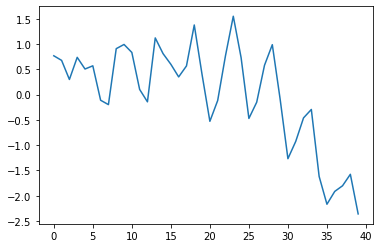

In [110]:
plt.plot(wave)

In [93]:
dt = 0.1
fs = 1/dt

# cutoff frequency 1~4
y = butter_highpass_filter(wave,4,fs)

In [86]:

def do_fft(wave_vec):
    N = len(wave_vec)            # サンプル数
    dt = 0.1         # サンプリング間隔
    fs = 1/dt 

    f, acf = ffs_dummy.blackman(wave_vec,N)

    F = np.fft.fft(f)
    F = F[:len(F)//2]
    
    # F = butter_lowpass_filter(F,4,fs)
    
    
    
    # F の0~2日までの周波数を阻止
    # if self.is_high_pass:
    #     F[:3] = 0
    
    # if self.is_low_pass:
    #     F[len(F)-3:] = 0

    # 振幅スペクトルを計算
    Amp = acf*np.abs(F/(N/2))
    return F, Amp

# 時系列データの微分

1. 時系列データに low pass filter 適用
2. 微分＝diffを取る

In [119]:
wave = standarize(value_dict['2012'][0].stock_wave.values)

In [122]:
fs

Fstrategy(strategy='stay', alpha=0.33, spectrum=array([3.29454069e+00, 2.54732657e+00, 2.38488047e-01, 9.14860614e-02,
       1.67355685e-01, 2.47577152e-01, 4.44306092e-01, 7.08551401e-01,
       2.33176209e+00, 2.12805847e+00, 3.08978389e-01, 8.71826360e-03,
       3.05938452e-03, 6.24895345e-03, 4.34795708e-02, 1.58203715e-01,
       1.65732143e-01, 1.00000000e-07, 1.00000000e-07, 1.00000000e-07]))

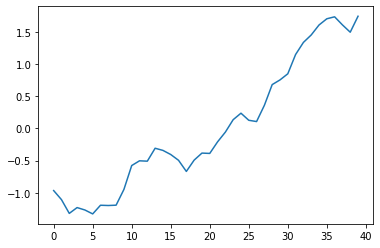

In [124]:
dt = 0.1
fs = 1/dt
y = butter_lowpass_filter(wave,4,fs)
plt.plot(y)

In [131]:
diff_y = np.diff(y)
sum(diff_y)

2.7057270061092744